In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
df = pd.read_csv("./assignment/application_data.csv")
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [3]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [4]:
# calculaing the percentage of null values in he dataset
df.isnull().sum() / len(df) * 100 

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [5]:
#droping the columns which are more than 35% of null values
selected_columns = df.columns[(df.isnull().sum() / len(df) * 100 < 35) == True]
df1 = df[selected_columns].copy()

In [6]:
# Getting the info of the new dataset
df1.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [7]:
df1.drop(columns = ['FLAG_EMP_PHONE',"FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE",
                    "FLAG_EMAIL",'WEEKDAY_APPR_PROCESS_START',"HOUR_APPR_PROCESS_START",
                    "REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION",
                    "LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY",
                    "REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY",'FLAG_DOCUMENT_2',
                   'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5',"FLAG_DOCUMENT_6",
                    "FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10",
                    "FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14",
                    "FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18",
                    "FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21","AMT_REQ_CREDIT_BUREAU_HOUR",
                    "AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE",
                    "OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT",
                   "AMT_REQ_CREDIT_BUREAU_YEAR","DAYS_LAST_PHONE_CHANGE","REGION_RATING_CLIENT_W_CITY"] , axis = 1,inplace = True)


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_TYPE_SUITE             306219 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

In [9]:
# Calculating the null values
df1.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
OCCUPATION_TYPE               96391
CNT_FAM_MEMBERS                   2
REGION_RATING_CLIENT              0
ORGANIZATION_TYPE                 0
EXT_SOURCE_2                    660
EXT_SOURCE_3                

# Handling Null Values

#### Handling missing values in AMT_ANNUITY column

In [10]:
df1[df1.AMT_ANNUITY.isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
47531       155054       0         Cash loans           M            N   
50035       157917       0         Cash loans           F            N   
51594       159744       0         Cash loans           F            N   
55025       163757       0         Cash loans           F            N   
59934       169487       0         Cash loans           M            Y   
75873       187985       0         Cash loans           M            Y   
89343       203726       0         Cash loans           F            Y   
123872      243648       0         Cash loans           F            N   
207186      340147       0         Cash loans           M            N   
227939      364022       0         Cash loans           F            N   
239329      377174       0         Cash loans           F            N   
241835      379997       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
47531                N             0          180000.0    450000.0   
50035                N             0           94500.0    450000.0   
51594                N             0          202500.0    539100.0   
55025                N             0          162000.0    296280.0   
59934                N             0          202500.0    360000.0   
75873                N             0          144000.0    219249.0   
89343                N             0           90000.0    157500.0   
123872               Y             0          202500.0    929088.0   
207186               N             0          171000.0    486000.0   
227939               Y             0          315000.0    628069.5   
239329               Y             0          157500.0    792000.0   
241835               N             0          315000.0   1483231.5   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
47531           NaN         450000.0   Unaccompanied  Commercial associate   
50035           NaN         450000.0   Unaccompanied               Working   
51594           NaN         450000.0   Unaccompanied               Working   
55025           NaN         225000.0   Unaccompanied         State servant   
59934           NaN         360000.0   Unaccompanied               Working   
75873           NaN         166500.0   Unaccompanied               Working   
89343           NaN         157500.0   Unaccompanied         State servant   
123872          NaN         720000.0   Unaccompanied               Working   
207186          NaN         486000.0   Unaccompanied  Commercial associate   
227939          NaN         499500.0   Unaccompanied  Commercial associate   
239329          NaN         792000.0          Family         State servant   
241835          NaN        1354500.0   Unaccompanied               Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
47531               Incomplete higher  Single / not married   
50035                 Lower secondary        Civil marriage   
51594   Secondary / secondary special               Married   
55025                Higher education               Married   
59934   Secondary / secondary special  Single / not married   
75873                Higher education  Single / not married   
89343   Secondary / secondary special               Married   
123872  Secondary / secondary special        Civil marriage   
207186               Higher education               Married   
227939               Higher education               Married   
239329  Secondary / secondary special               Married   
241835               Higher education               Married   

          NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
47531     House / apartment                    0.026392      -10668   
50035     House / apartment                    0.035792       -9027   
51594     House / apartment                    0.046220      -17376   
55025     House

In [11]:
df1.AMT_ANNUITY.mean(),df1.AMT_ANNUITY.median()

(27108.573909183444, 24903.0)

In [12]:
#There is a significant differene between mean and median so filling the values with median

In [13]:
df1.AMT_ANNUITY.fillna(df1.AMT_ANNUITY.median(),inplace = True)

#### Handling missing values in AMT_GOODS_PRICE column


In [14]:
df1[df1.AMT_GOODS_PRICE.isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
724         100837       0    Revolving loans           F            N   
5937        106955       0    Revolving loans           F            N   
6425        107494       0    Revolving loans           F            N   
6703        107822       0    Revolving loans           F            N   
7647        108913       0    Revolving loans           M            N   
7880        109190       1    Revolving loans           F            N   
7995        109322       0    Revolving loans           M            N   
10819       112595       0    Revolving loans           F            N   
11287       113148       0    Revolving loans           F            N   
13008       115162       0    Revolving loans           F            N   
14699       117150       0    Revolving loans           M            N   
15953       118618       0    Revolving loans           F            N   
18935       122080       0    Revolving loans           M            N   
19178       122374       0    Revolving loans           F            N   
19921       123233       0    Revolving loans           F            N   
21193       124697       0    Revolving loans           F            N   
21338       124859       0    Revolving loans           M            N   
21546       125096       0    Revolving loans           F            N   
25391       129532       0    Revolving loans           M            N   
26398       130692       0    Revolving loans           M            N   
26736       131077       0    Revolving loans           F            N   
27003       131385       0    Revolving loans           M            N   
28201       132778       0    Revolving loans           F            N   
29059       133761       0    Revolving loans           F            N   
30164       135010       0    Revolving loans           F            N   
30294       135159       0    Revolving loans           M            N   
32143       137268       0    Revolving loans           M            N   
36250       141975       0    Revolving loans           F            N   
36721       142532       0    Revolving loans           M            N   
39230       145435       0    Revolving loans           F            N   
40571       146988       0    Revolving loans           F            N   
41099       147593       1    Revolving loans           F            N   
41161       147655       0    Revolving loans           M            N   
41982       148605       0    Revolving loans           M            N   
42024       148658       0    Revolving loans           F            N   
43630       150507       0    Revolving loans           M            N   
45657       152889       0    Revolving loans           M            N   
47627       155169       0    Revolving loans           F            N   
50540       158525       1    Revolving loans           F            N   
52711       161052       0    Revolving loans           M            N   
52955       161332       0    Revolving loans           F            N   
54045       162615       0    Revolving loans           F            N   
55600       164423       0    Revolving loans           F            N   
56002       164897       1    Revolving loans           F            N   
58595       167920       0    Revolving loans           F            N   
58653       167989       0    Revolving loans           M            N   
60622       170291       0    Revolving loans           M            N   
61022       170764       0    Revolving loans           F            N   
61072       170823       0    Revolving loans           F            N   
61618       171462       0    Revolving loans           M            N   
63319       173434       0    Revolving loans           F            N   
64118       174350       0    Revolving loans           F            N   
64184       174427       0    Revolving loans           F            N   
66168       

In [15]:
#  All missing values has NAME_CONTRACT_TYPE as Revolving loans, Hence calculating the mean and median for the revolving loans

In [16]:
df1.AMT_GOODS_PRICE[df1.NAME_CONTRACT_TYPE == 'Revolving loans'].mean(),df1.AMT_GOODS_PRICE[df1.NAME_CONTRACT_TYPE == 'Revolving loans'].median()

(325724.37157339405, 270000.0)

In [17]:
#There is a significant differene between mean and median so filling the values with median

In [18]:
df1.AMT_GOODS_PRICE.fillna(df1.AMT_GOODS_PRICE[df1.NAME_CONTRACT_TYPE == 'Revolving loans'].median(),inplace = True)

#### Handling missing values in EXT_SOURCE_2 column


In [19]:
#calculating the oal null values
df1.EXT_SOURCE_2.isnull().sum()

660

In [20]:
df1[df1.EXT_SOURCE_2.isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
329         100377       0         Cash loans           M            N   
349         100402       0         Cash loans           F            N   
617         100706       0         Cash loans           F            N   
1028        101189       0         Cash loans           F            Y   
1520        101787       0         Cash loans           M            Y   
2098        102466       0         Cash loans           F            N   
2426        102831       0         Cash loans           F            N   
2448        102855       0         Cash loans           F            Y   
2756        103215       0         Cash loans           F            N   
3212        103750       0         Cash loans           F            N   
3456        104033       0         Cash loans           F            N   
3525        104116       1         Cash loans           F            N   
3812        104454       0         Cash loans           F            N   
4458        105211       0         Cash loans           M            Y   
4562        105334       0         Cash loans           M            N   
4748        105550       0         Cash loans           F            N   
5892        106897       0         Cash loans           M            N   
6138        107173       0         Cash loans           F            N   
6432        107501       0    Revolving loans           F            N   
6992        108143       0         Cash loans           F            N   
7220        108403       0    Revolving loans           F            N   
7402        108629       0         Cash loans           F            N   
7491        108733       1         Cash loans           F            N   
7730        109018       0         Cash loans           F            N   
9117        110599       0         Cash loans           F            N   
9184        110677       0         Cash loans           F            N   
10050       111697       0         Cash loans           M            N   
10881       112662       0         Cash loans           F            N   
10910       112701       0         Cash loans           F            Y   
11400       113271       0         Cash loans           F            N   
11881       113848       0         Cash loans           F            N   
12065       114071       0         Cash loans           M            Y   
12386       114438       0         Cash loans           F            N   
12516       114587       0         Cash loans           F            N   
12825       114949       0         Cash loans           F            N   
12898       115032       0         Cash loans           F            N   
13499       115734       0         Cash loans           F            N   
14314       116698       0         Cash loans           F            Y   
14714       117166       0         Cash loans           F            N   
14869       117356       0         Cash loans           F            N   
15709       118330       0         Cash loans           M            Y   
15795       118434       1         Cash loans           M            Y   
15858       118504       0         Cash loans           M            Y   
16376       119100       0         Cash loans           F            N   
16498       119244       0         Cash loans           F            N   
16505       119254       0         Cash loans           F            N   
17029       119865       0         Cash loans           F            Y   
17436       120336       0         Cash loans           M            Y   
18349       121404       0         Cash loans           F            N   
19661       122929       0         Cash loans           M            Y   
20042       123380       0    Revolving loans           M            Y   
20686       124115       0         Cash loans           F            N   
20843       124290       0         Cash loans           F            N   
20988       

In [21]:
#calculating the mean and median for the column
df1.EXT_SOURCE_2.mean(),df1.EXT_SOURCE_2.median()

(0.5143926741308462, 0.5659614260608526)

In [22]:
#There is a significant differene between mean and median so filling the values with median

In [23]:
df1.EXT_SOURCE_2.fillna(df1.EXT_SOURCE_2.median(), inplace = True)

In [24]:
df1.EXT_SOURCE_2.isnull().sum()

0

In [25]:
#calculating the oal null values
df1.EXT_SOURCE_3.isnull().sum()

60965

#### Handling missing values in EXT_SOURCE_3 column


In [26]:
#calculating the oal null values
df1.EXT_SOURCE_3.isnull().sum()

60965

In [27]:
df1[df1.EXT_SOURCE_3.isnull()].head(200)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1        100003       0         Cash loans           F            N   
3        100006       0         Cash loans           F            N   
4        100007       0         Cash loans           M            N   
9        100012       0    Revolving loans           M            N   
14       100018       0         Cash loans           F            N   
17       100021       0    Revolving loans           F            N   
20       100024       0    Revolving loans           M            Y   
29       100034       0    Revolving loans           M            N   
31       100036       0         Cash loans           F            N   
34       100040       0         Cash loans           F            N   
41       100048       0         Cash loans           F            N   
44       100051       0         Cash loans           M            N   
45       100052       0    Revolving loans           F            N   
49       100056       0         Cash loans           M            Y   
69       100081       0         Cash loans           M            Y   
78       100093       0         Cash loans           F            N   
80       100095       0    Revolving loans           F            N   
83       100098       0    Revolving loans           M            Y   
86       100101       0         Cash loans           F            Y   
89       100104       0         Cash loans           F            N   
97       100115       0         Cash loans           F            N   
99       100118       0         Cash loans           F            N   
108      100127       0         Cash loans           M            N   
109      100129       0    Revolving loans           F            Y   
113      100133       0         Cash loans           F            N   
116      100136       0         Cash loans           M            Y   
117      100137       0         Cash loans           F            Y   
120      100140       0    Revolving loans           F            N   
123      100144       0         Cash loans           F            N   
136      100158       0         Cash loans           M            N   
160      100189       0         Cash loans           F            N   
168      100197       0         Cash loans           F            N   
177      100206       0         Cash loans           M            Y   
184      100214       1         Cash loans           F            N   
186      100216       0         Cash loans           F            N   
189      100219       0         Cash loans           M            N   
194      100226       0    Revolving loans           F            N   
203      100236       0         Cash loans           M            Y   
216      100251       0         Cash loans           M            Y   
217      100252       0         Cash loans           F            N   
221      100258       0         Cash loans           F            N   
235      100273       1         Cash loans           F            N   
238      100276       0         Cash loans           F            Y   
239      100277       0         Cash loans           M            Y   
242      100282       1    Revolving loans           F            Y   
245      100285       0    Revolving loans           F            N   
246      100286       1         Cash loans           M            Y   
247      100287       0         Cash loans           F            N   
248      100288       0         Cash loans           F            N   
256      100296       0         Cash loans           M            N   
257      100297       0         Cash loans           M            Y   
258      100298       0         Cash loans           F            N   
265      100305       0         Cash loans           M            Y   
268      100309       0         Cash loans           F            N   
275      100318       0         Cash loans           F            N   
277      100320       0      

In [28]:
#calculating the mean and median for the column
df1.EXT_SOURCE_3.mean(),df1.EXT_SOURCE_3.median()

(0.5108529061799658, 0.5352762504724826)

In [29]:
#There is a significant differene between mean and median so filling the values with median

In [30]:
df1.EXT_SOURCE_3.fillna(df1.EXT_SOURCE_3.median(), inplace = True)

In [31]:
df1.EXT_SOURCE_2.isnull().sum()

0

#### Handling missing values in CNT_FAM_MEMBERS column

In [32]:
df1.CNT_FAM_MEMBERS.isnull().sum()

2

In [33]:
df1[df1.CNT_FAM_MEMBERS.isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
41982       148605       0    Revolving loans           M            N   
187348      317181       0    Revolving loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
41982                Y             0          450000.0    675000.0   
187348               Y             0          202500.0    585000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
41982       33750.0         270000.0             NaN  Commercial associate   
187348      29250.0         270000.0             NaN  Commercial associate   

       NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
41982      Lower secondary            Unknown  Municipal apartment   
187348    Higher education            Unknown    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
41982                     0.015221      -12396          -1161   
187348                    0.031329      -12844           -232   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL OCCUPATION_TYPE  \
41982             -3265.0            -4489           1        Managers   
187348            -1597.0            -1571           1     Accountants   

        CNT_FAM_MEMBERS  REGION_RATING_CLIENT       ORGANIZATION_TYPE  \
41982               NaN                     2               Insurance   
187348              NaN                     2  Business Entity Type 2   

        EXT_SOURCE_2  EXT_SOURCE_3  
41982       0.700618      0.535276  
187348      0.645168      0.670652

In [34]:
#since there are only two records can drop the records.

In [35]:
df1 = df1[~(df1.CNT_FAM_MEMBERS.isnull())]

In [36]:
df1.CNT_FAM_MEMBERS.isnull().sum()

0

#### Handling missing values in NAME_TYPE_SUITE column


In [37]:
df1.NAME_TYPE_SUITE.isnull().sum()

1290

In [38]:
df1[df1.NAME_TYPE_SUITE.isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
64          100076       0         Cash loans           M            Y   
724         100837       0    Revolving loans           F            N   
1199        101414       0         Cash loans           M            Y   
1669        101954       0         Cash loans           F            Y   
1862        102183       0         Cash loans           F            Y   
2271        102661       0         Cash loans           F            N   
2625        103065       0         Cash loans           F            N   
2650        103093       0         Cash loans           M            Y   
3012        103519       0         Cash loans           F            Y   
3050        103560       0         Cash loans           F            N   
3371        103938       0         Cash loans           F            N   
3718        104339       0         Cash loans           F            N   
4063        104754       0         Cash loans           M            Y   
4193        104904       0         Cash loans           F            N   
4240        104962       0         Cash loans           F            N   
4338        105076       0         Cash loans           F            Y   
4428        105177       0         Cash loans           M            Y   
4669        105460       0         Cash loans           F            Y   
4749        105551       0         Cash loans           F            N   
4876        105701       0         Cash loans           M            Y   
5304        106200       0         Cash loans           F            N   
5786        106766       0         Cash loans           M            Y   
5804        106785       0         Cash loans           F            N   
5937        106955       0    Revolving loans           F            N   
6425        107494       0    Revolving loans           F            N   
6526        107611       0         Cash loans           F            Y   
6694        107812       0         Cash loans           F            Y   
6703        107822       0    Revolving loans           F            N   
6977        108127       0         Cash loans           M            Y   
7021        108174       0         Cash loans           F            Y   
7122        108291       0         Cash loans           F            N   
7157        108329       0         Cash loans           M            Y   
7288        108489       0         Cash loans           F            N   
7647        108913       0    Revolving loans           M            N   
7880        109190       1    Revolving loans           F            N   
7995        109322       0    Revolving loans           M            N   
8108        109455       0         Cash loans           F            Y   
8192        109552       0         Cash loans           M            Y   
8351        109730       0         Cash loans           M            Y   
9264        110775       0         Cash loans           F            N   
9769        111373       0         Cash loans           F            N   
10819       112595       0    Revolving loans           F            N   
10965       112764       0         Cash loans           F            Y   
11104       112936       1         Cash loans           F            N   
11151       112995       0         Cash loans           M            Y   
11287       113148       0    Revolving loans           F            N   
11903       113876       0         Cash loans           F            N   
12024       114022       0         Cash loans           F            N   
12160       114179       0         Cash loans           M            Y   
12220       114249       0         Cash loans           M            N   
12846       114973       0         Cash loans           M            Y   
13008       115162       0    Revolving loans           F            N   
13602       115851       0         Cash loans           F            N   
13729       

In [39]:
#calculating the mode for the column
df1.NAME_TYPE_SUITE.mode()

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [40]:
#imputing the missing values of the row with this mode value

In [41]:
df1.NAME_TYPE_SUITE.fillna(df1.NAME_TYPE_SUITE.mode()[0], inplace = True)

#### Handling missing values in OCCUPATION_TYPE column


In [42]:
df1.OCCUPATION_TYPE.isnull().sum()

96391

In [43]:
df1[df1.OCCUPATION_TYPE.isnull()].head(100)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
8        100011       0         Cash loans           F            N   
11       100015       0         Cash loans           F            N   
23       100027       0         Cash loans           F            N   
28       100033       0         Cash loans           M            Y   
30       100035       0         Cash loans           F            N   
38       100045       0         Cash loans           F            N   
43       100050       0         Cash loans           F            N   
44       100051       0         Cash loans           M            N   
46       100053       0         Cash loans           F            N   
52       100060       0         Cash loans           M            Y   
54       100062       0         Cash loans           M            Y   
56       100064       0         Cash loans           F            N   
62       100073       0         Cash loans           M            Y   
63       100075       0         Cash loans           F            N   
76       100088       0    Revolving loans           F            N   
79       100094       0         Cash loans           F            N   
81       100096       1         Cash loans           F            N   
82       100097       0         Cash loans           M            Y   
84       100099       0         Cash loans           F            N   
88       100103       0         Cash loans           F            N   
94       100112       1         Cash loans           M            Y   
97       100115       0         Cash loans           F            N   
99       100118       0         Cash loans           F            N   
105      100124       0         Cash loans           M            N   
106      100125       0         Cash loans           F            N   
107      100126       0    Revolving loans           M            N   
108      100127       0         Cash loans           M            N   
109      100129       0    Revolving loans           F            Y   
117      100137       0         Cash loans           F            Y   
118      100138       0         Cash loans           M            Y   
119      100139       0         Cash loans           F            N   
125      100146       0         Cash loans           M            Y   
135      100157       0         Cash loans           M            N   
140      100162       0         Cash loans           F            N   
141      100163       0         Cash loans           F            N   
143      100165       0         Cash loans           F            Y   
145      100167       0         Cash loans           F            N   
148      100175       0         Cash loans           F            N   
150      100177       0         Cash loans           M            N   
151      100178       0         Cash loans           F            N   
156      100183       0         Cash loans           F            N   
157      100185       0         Cash loans           M            N   
158      100186       0         Cash loans           F            N   
164      100193       0         Cash loans           F            Y   
166      100195       0         Cash loans           M            Y   
171      100200       0         Cash loans           F            N   
173      100202       0         Cash loans           F            N   
174      100203       0         Cash loans           F            N   
175      100204       0         Cash loans           F            N   
184      100214       1         Cash loans           F            N   
185      100215       0         Cash loans           F            Y   
191      100221       0         Cash loans           F            N   
192      100224       0         Cash loans           F            Y   
200      100233       0         Cash loans           F            N   
213      100248       0         Cash loans           F            N   
220      100257       0      

In [44]:
df1.OCCUPATION_TYPE.value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21370
Drivers                  18603
High skill tech staff    11380
Accountants               9812
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [45]:
# since this is a caegorical Value we can impute the missing values with mode
# But in this scenerio as we cannot impute the occupation with the mode 
# we are filling the null values with an unknown occupation category.

In [46]:
df1.OCCUPATION_TYPE.fillna('unknown', inplace = True)

In [47]:
df1.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
FLAG_MOBIL                    0
OCCUPATION_TYPE               0
CNT_FAM_MEMBERS               0
REGION_RATING_CLIENT          0
ORGANIZATION_TYPE             0
EXT_SOURCE_2                  0
EXT_SOURCE_3                  0
dtype: int64

In [48]:
#geting the info of the dataframe for further analysis
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307509 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307509 non-null  int64  
 1   TARGET                      307509 non-null  int64  
 2   NAME_CONTRACT_TYPE          307509 non-null  object 
 3   CODE_GENDER                 307509 non-null  object 
 4   FLAG_OWN_CAR                307509 non-null  object 
 5   FLAG_OWN_REALTY             307509 non-null  object 
 6   CNT_CHILDREN                307509 non-null  int64  
 7   AMT_INCOME_TOTAL            307509 non-null  float64
 8   AMT_CREDIT                  307509 non-null  float64
 9   AMT_ANNUITY                 307509 non-null  float64
 10  AMT_GOODS_PRICE             307509 non-null  float64
 11  NAME_TYPE_SUITE             307509 non-null  object 
 12  NAME_INCOME_TYPE            307509 non-null  object 
 13  NAME_EDUCATION_TYPE

In [49]:
# checking the values of all the categorical values
cols=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE',
      'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE']

for i in cols:
    display(df1[i].value_counts())

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29277
Name: count, dtype: int64

CODE_GENDER
F      202447
M      105058
XNA         4
Name: count, dtype: int64

FLAG_OWN_CAR
N    202922
Y    104587
Name: count, dtype: int64

FLAG_OWN_REALTY
Y    213310
N     94199
Name: count, dtype: int64

NAME_TYPE_SUITE
Unaccompanied      249816
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71615
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74862
Incomplete higher                 10277
Lower secondary                    3815
Academic degree                     164
Name: count, dtype: int64

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: count, dtype: int64

NAME_HOUSING_TYPE
House / apartment      272867
With parents            14840
Municipal apartment     11182
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: count, dtype: int64

OCCUPATION_TYPE
unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21370
Drivers                  18603
High skill tech staff    11380
Accountants               9812
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10552
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

In [50]:
#as we see some of the values for CODE_GENDER is XNA Let's try to see and fix them

#### Fixing the values of CODE_GENDER

In [51]:
df1[df1.CODE_GENDER == 'XNA']

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
35657       141289       0    Revolving loans         XNA            Y   
38566       144669       0    Revolving loans         XNA            N   
83382       196708       0    Revolving loans         XNA            N   
189640      319880       0    Revolving loans         XNA            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
35657                Y             0          207000.0    382500.0   
38566                Y             2          157500.0    270000.0   
83382                Y             1          135000.0    405000.0   
189640               Y             0          247500.0    540000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
35657       19125.0         337500.0   Unaccompanied               Working   
38566       13500.0         225000.0          Family               Working   
83382       20250.0         225000.0   Unaccompanied               Working   
189640      27000.0         900000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
35657   Secondary / secondary special            Married  Municipal apartment   
38566   Secondary / secondary special            Married    House / apartment   
83382                Higher education            Married    House / apartment   
189640              Incomplete higher     Civil marriage    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
35657                     0.020713      -20232         -10044   
38566                     0.026392      -13717          -2797   
83382                     0.035792      -10647          -1228   
189640                    0.035792       -9649          -2293   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL     OCCUPATION_TYPE  \
35657            -10024.0            -3537           1             unknown   
38566             -2241.0            -4659           1  Low-skill Laborers   
83382              -183.0            -1671           1          Core staff   
189640            -4099.0            -2326           1             unknown   

        CNT_FAM_MEMBERS  REGION_RATING_CLIENT       ORGANIZATION_TYPE  \
35657               2.0                     3  Business Entity Type 1   
38566               4.0                     2        Industry: type 3   
83382               3.0                     2            Kindergarten   
189640              2.0                     2                Medicine   

        EXT_SOURCE_2  EXT_SOURCE_3  
35657       0.295998      0.461482  
38566       0.709205      0.310818  
83382       0.659185      0.076984  
189640      0.658620      0.360613

In [52]:
# AS they are missing completely at random we can drop the values

In [53]:
df1 = df1[~(df1.CODE_GENDER == 'XNA')]

In [54]:
df1.CODE_GENDER.value_counts()

CODE_GENDER
F    202447
M    105058
Name: count, dtype: int64

#### Fixing the values of ORGANIZATION_TYPE

In [55]:
df1[df1.ORGANIZATION_TYPE == 'XNA'][['NAME_INCOME_TYPE','OCCUPATION_TYPE']].value_counts()

NAME_INCOME_TYPE  OCCUPATION_TYPE
Pensioner         unknown            55350
Unemployed        unknown               22
Pensioner         Cleaning staff         2
Name: count, dtype: int64

In [56]:
#All of the values that are XNA has the NAME_INCOME_TYPE as Pensioner,unemployed and OCCUPATION_TYPE as unknown and cleaning staff


In [57]:
def replace_pensioner_values(df):
    df['OCCUPATION_TYPE'] = df.OCCUPATION_TYPE.replace('unknown','Pensioner')
    df['ORGANIZATION_TYPE'] = df.ORGANIZATION_TYPE.replace('XNA','Pensioner')
    return df

In [58]:
#For the NAME_INCOME_TYPE as pensioner who has OCCUPATION_TYPE as unknown we will replace OCCUPATION_TYPE and ORGANIZAION_TYPE 
# with Pensioner

df1[(df1.NAME_INCOME_TYPE == 'Pensioner')&(df1.OCCUPATION_TYPE == 'unknown')&(df1.ORGANIZATION_TYPE == 'XNA')] = df1[(df1.NAME_INCOME_TYPE == 'Pensioner')&(df1.OCCUPATION_TYPE == 'unknown')&(df1.ORGANIZATION_TYPE == 'XNA')].apply(replace_pensioner_values , axis = 1)

In [59]:
df1[df1.ORGANIZATION_TYPE == 'XNA'][['NAME_INCOME_TYPE','OCCUPATION_TYPE']].value_counts()

NAME_INCOME_TYPE  OCCUPATION_TYPE
Unemployed        unknown            22
Pensioner         Cleaning staff      2
Name: count, dtype: int64

In [60]:
#For the NAME_INCOME_TYPE as unemployed who has OCCUPATION_TYPE as unknown we will replace ORGANIZAION_TYPE with Unknown

In [61]:
def replace_unemployed_values(df):
    df['ORGANIZATION_TYPE'] = df.ORGANIZATION_TYPE.replace('XNA','unknown')
    return df

In [62]:
df1[(df1.NAME_INCOME_TYPE == 'Unemployed')&(df1.OCCUPATION_TYPE == 'unknown')&(df1.ORGANIZATION_TYPE == 'XNA')] = df1[(df1.NAME_INCOME_TYPE == 'Unemployed')&(df1.OCCUPATION_TYPE == 'unknown')&(df1.ORGANIZATION_TYPE == 'XNA')].apply(replace_unemployed_values , axis = 1)

In [63]:
df1[df1.ORGANIZATION_TYPE == 'XNA'][['NAME_INCOME_TYPE','OCCUPATION_TYPE']].value_counts()

NAME_INCOME_TYPE  OCCUPATION_TYPE
Pensioner         Cleaning staff     2
Name: count, dtype: int64

In [64]:
cols = ["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"]

df1[cols] = abs(df1[cols]//365)
df1[cols].head()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH
0          26              2               10.0                6
1          46              4                4.0                1
2          53              1               12.0                7
3          53              9               27.0                7
4          55              9               12.0               10

In [65]:
#renaming the columns
new_cols = ["YEAR_BIRTH","YEAR_EMPLOYED","YEAR_REGISTRATION","YEAR_ID_PUBLISH"]

df1.rename(columns = dict(zip(cols, new_cols)) , inplace = True)

In [66]:
df1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  YEAR_BIRTH  YEAR_EMPLOYED  YEAR_REGISTRATION  \
0                    0.018801          26              2               10.0   
1                    0.003541          46              4                4.0   
2                    0.010032          53              1               12.0   
3                    0.008019          53              9               27.0   
4                    0.028663          55              9               12.0   

   YEAR_ID_PUBLISH  FLAG_MOBIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                6           1        Laborers              1.0   
1                1           1      Core staff              2.0   
2                7           1        Laborers              1.0   
3                7           1        Laborers              2.0   
4               10           1      Core staff              1.0   

   REGION_RATING_CLIENT       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  
0                     2  Business Entity Type 3      0.262949      0.139376  
1                     1                  School      0.622246      0.535276  
2                     2              Government      0.555912      0.729567  
3                     2  Business Entity Type 3      0.650442      0.535276  
4                     2                Religion      0.322738      0.535276

In [67]:
#converting the FLAG_OWN_CAR and FLAG_OWN_REALTY to binary for ease of use
df1[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']] = df1[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']].applymap(lambda x: 1 if x == 'Y' else 0)


In [68]:
df1[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']].head()

FLAG_OWN_CAR  FLAG_OWN_REALTY
0             0                1
1             0                0
2             1                1
3             0                1
4             0                1

In [69]:
# converting the data types of required columns

In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307505 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307505 non-null  int64  
 1   TARGET                      307505 non-null  int64  
 2   NAME_CONTRACT_TYPE          307505 non-null  object 
 3   CODE_GENDER                 307505 non-null  object 
 4   FLAG_OWN_CAR                307505 non-null  int64  
 5   FLAG_OWN_REALTY             307505 non-null  int64  
 6   CNT_CHILDREN                307505 non-null  int64  
 7   AMT_INCOME_TOTAL            307505 non-null  float64
 8   AMT_CREDIT                  307505 non-null  float64
 9   AMT_ANNUITY                 307505 non-null  float64
 10  AMT_GOODS_PRICE             307505 non-null  float64
 11  NAME_TYPE_SUITE             307505 non-null  object 
 12  NAME_INCOME_TYPE            307505 non-null  object 
 13  NAME_EDUCATION_TYPE

In [71]:
# As SK_ID is unique we will convert them into object data type

In [72]:
df1['SK_ID_CURR'] = df1['SK_ID_CURR'].astype('object')

In [73]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307505 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307505 non-null  object 
 1   TARGET                      307505 non-null  int64  
 2   NAME_CONTRACT_TYPE          307505 non-null  object 
 3   CODE_GENDER                 307505 non-null  object 
 4   FLAG_OWN_CAR                307505 non-null  int64  
 5   FLAG_OWN_REALTY             307505 non-null  int64  
 6   CNT_CHILDREN                307505 non-null  int64  
 7   AMT_INCOME_TOTAL            307505 non-null  float64
 8   AMT_CREDIT                  307505 non-null  float64
 9   AMT_ANNUITY                 307505 non-null  float64
 10  AMT_GOODS_PRICE             307505 non-null  float64
 11  NAME_TYPE_SUITE             307505 non-null  object 
 12  NAME_INCOME_TYPE            307505 non-null  object 
 13  NAME_EDUCATION_TYPE

## Outlier Analysis

In [74]:
# plotting the boxplots for all the numerical variables

In [75]:
plot_cols = df1.select_dtypes(include= ['int64','float64']).columns.tolist()

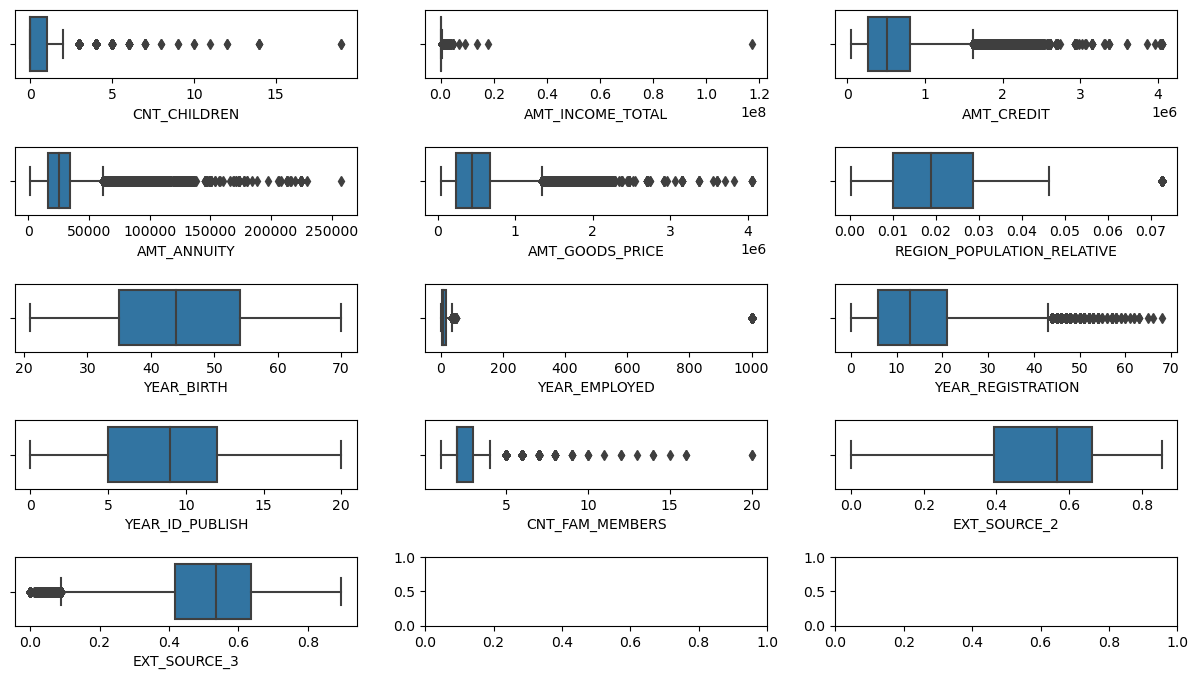

In [76]:
# we will be removing the below columns as Target, FLAG_OWN_CAR, FLAG_OWN_REALTY, FLAG_MOBIL is binary and 
#REGION_RATING_CLIENT has only 3 values
remove = ['TARGET','FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL','REGION_RATING_CLIENT']
for i in remove:
    if i in plot_cols:
        plot_cols.remove(i)
num_cols = 3
num_rows = (len(plot_cols) + num_cols - 1) // num_cols 
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))
plt.subplots_adjust(hspace =1)
axes = axes.flatten()
for i, col in enumerate(plot_cols):
    if ((col == 'TARGET') or (col=='FLAG_OWN_CAR') or (col == 'FLAG_OWN_REALTY')):
        continue
    else:
        sns.boxplot(x=df1[col], ax=axes[i])


## Analysis of Outliers:



In [77]:
df1.YEAR_REGISTRATION.describe()

count    307505.000000
mean         14.165796
std           9.647139
min           0.000000
25%           6.000000
50%          13.000000
75%          21.000000
max          68.000000
Name: YEAR_REGISTRATION, dtype: float64

In [78]:
df1.YEAR_BIRTH.describe()

count    307505.000000
mean         44.433238
std          11.954491
min          21.000000
25%          35.000000
50%          44.000000
75%          54.000000
max          70.000000
Name: YEAR_BIRTH, dtype: float64

1. CNT_CHILDREN:

> Outliers are observed in the range from 3 to 19.

2. AMT_INCOME_TOTAL

> We have an Outlier in the data but there might be individuals with high income so we cannot ignore the value.

3. AMT_CREDIT, AMT_ANNUITY, and AMT_GOODS_PRICE

> These too have outliers but there might be people who took various credis amount, annuity and goods price

> There is not much deviation in the quantile values as well so we can consider them in our analysis

4. REGION_POPULATION_RELATIVE:
    
> We have an outlier here as well but considering that there might be regions with more population density we can consider
>value for our analysis

5. CNT_FAM_MEMBERS:

> Outliers are observed in the range from 5 to 20.

6. YEAR_BIRTH,EXT_SOURCE_2,EXT_SOURCE_3,YEAR_ID_PUBLISH

> No much outliers are found in these columns

7. YEAR_EMPLOYED

> we can see there is a huge outlier in this column we will be looking into it now

In [79]:
# checking the outlier in YEAR_EMPLOYED

df1.YEAR_EMPLOYED.quantile([0.2,0.4,0.6,0.8,0.9])

0.2       3.0
0.4       5.0
0.6       9.0
0.8      26.0
0.9    1000.0
Name: YEAR_EMPLOYED, dtype: float64

In [80]:
len(df1[df1.YEAR_EMPLOYED == 1000])

55374

In [81]:
df1[df1.YEAR_EMPLOYED == 1000]['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Pensioner     55352
Unemployed       22
Name: count, dtype: int64

In [82]:
# As we can see this data is invalid we can drop the values

In [83]:
df1 = df1[~(df1.YEAR_EMPLOYED == 1000)]

In [84]:
df1.YEAR_EMPLOYED.quantile([0.2,0.4,0.6,0.8,0.9])

0.2     2.0
0.4     4.0
0.6     6.0
0.8    11.0
0.9    15.0
Name: YEAR_EMPLOYED, dtype: float64

#### We have successfully handled this outlier

# UniVariate Analysis


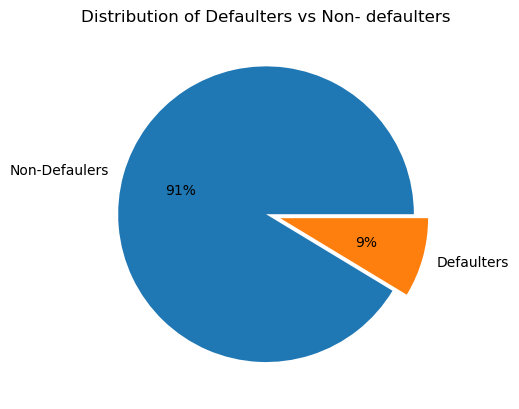

In [85]:
explode = [0, 0.1] 
plt.pie(df1.TARGET.value_counts() , labels = ['Non-Defaulers','Defaulters'], 
        explode=explode, autopct='%.0f%%')
plt.title('Distribution of Defaulters vs Non- defaulters')
plt.show()

In [86]:
# As we can see there are about 91% of the total applicants are Non-Defaulters ehich is a huge majority
# 9% of the applicants are defaulters

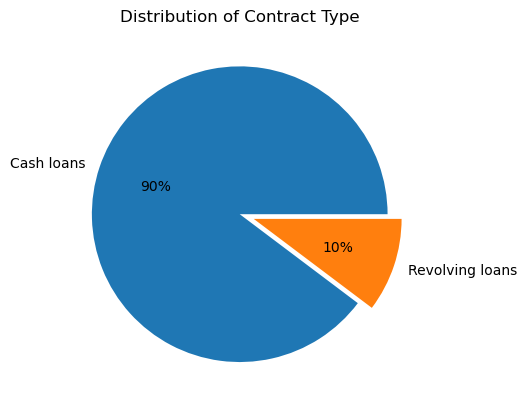

In [87]:
explode = [0, 0.1] 
plt.pie(df1.NAME_CONTRACT_TYPE.value_counts() , labels = df1.NAME_CONTRACT_TYPE.value_counts().index, 
        explode=explode, autopct='%.0f%%')
plt.title('Distribution of Contract Type')
plt.show()

In [88]:
# As we can see there are about 90% of the total applications are cash loans which is a huge majority
# 10% of the applications are Revolving loans

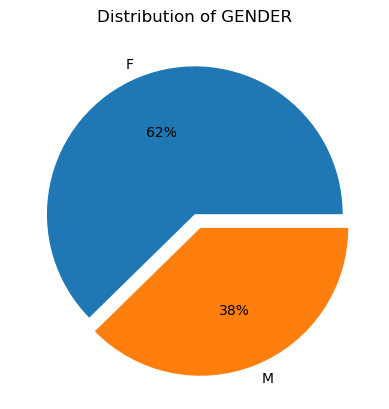

In [89]:
explode = [0, 0.1] 
plt.pie(df1.CODE_GENDER.value_counts() , labels = df1.CODE_GENDER.value_counts().index, 
        explode=explode, autopct='%.0f%%')
plt.title('Distribution of GENDER')
plt.show()

In [90]:
# 62% of the applicants are females and 38% are males
# Majority of the applicants are females

In [91]:
df1.NAME_TYPE_SUITE.value_counts(normalize = True)

NAME_TYPE_SUITE
Unaccompanied      0.817468
Family             0.125562
Spouse, partner    0.038325
Children           0.008924
Other_B            0.005842
Other_A            0.003022
Group of people    0.000857
Name: proportion, dtype: float64

In [92]:
# Majority of the applicants are unaccompanied while they were applying
# Very less people were accompanied by a group of people

In [93]:
df1.NAME_INCOME_TYPE.value_counts(normalize = True)

NAME_INCOME_TYPE
Working                 0.629716
Commercial associate    0.284035
State servant           0.086078
Student                 0.000071
Pensioner               0.000040
Businessman             0.000040
Maternity leave         0.000020
Name: proportion, dtype: float64

In [94]:
# Most the people who applied for loan are of working class and Commercial associate

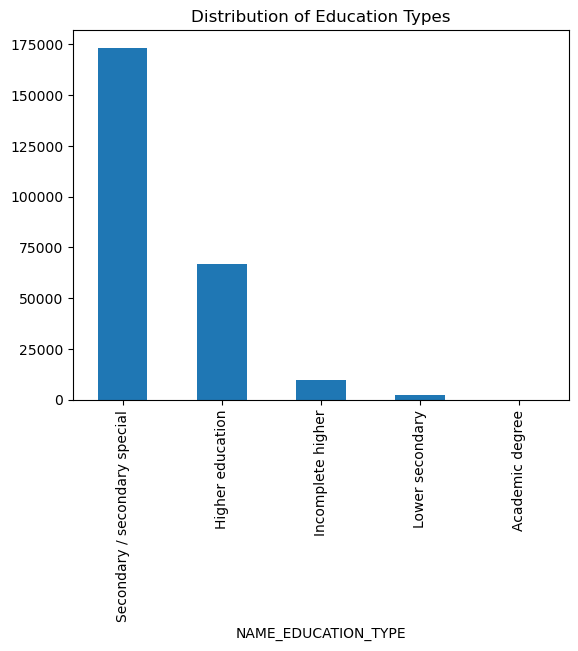

In [95]:
df1.NAME_EDUCATION_TYPE.value_counts().plot.bar()
plt.title('Distribution of Education Types')
plt.show()

In [96]:
# People with Secondary / Secondary special as education background applied for credit more

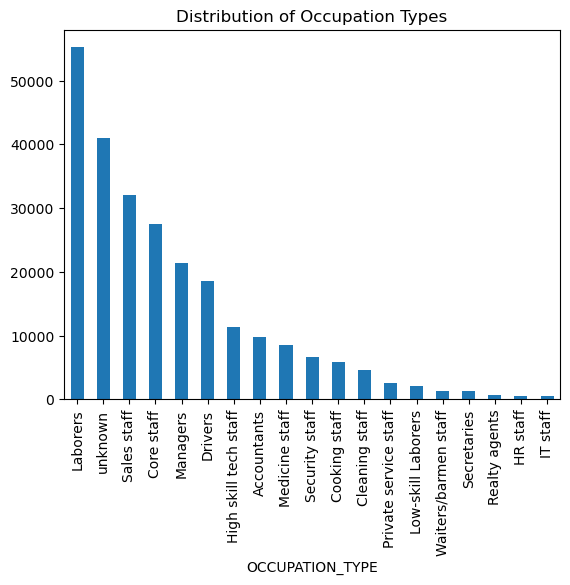

In [97]:
df1.OCCUPATION_TYPE.value_counts().plot.bar()
plt.title('Distribution of Occupation Types')
plt.show()


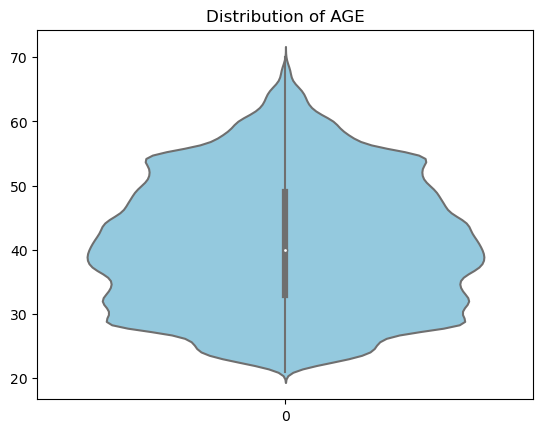

In [98]:
sns.violinplot(df1.YEAR_BIRTH , color='skyblue')
plt.title('Distribution of AGE')
plt.show()

In [99]:
# As we can see Most the people in he age group of 25-55 applied for more loans
# After 55 lesss people were applying for loans.

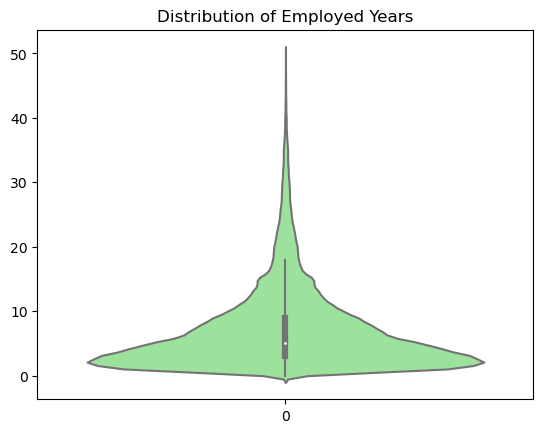

In [100]:
sns.violinplot(df1.YEAR_EMPLOYED , color='lightgreen')
plt.title('Distribution of Employed Years')
plt.show()

In [101]:
#As we can see More poplein the range of 1-5 years applied for more loans
# After 5 ears the number of people applying for loans are decresed drastically and almost flattened at later ages.

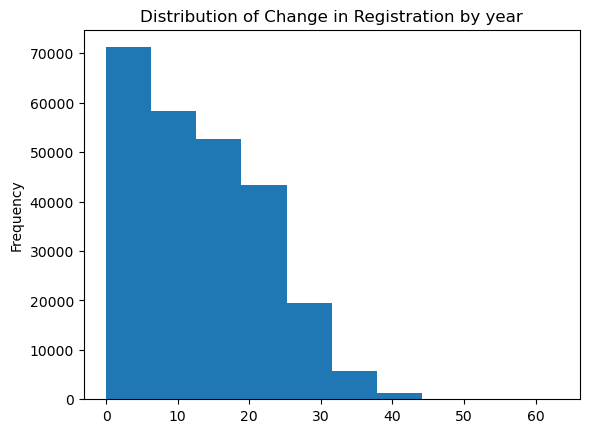

In [102]:
df1.YEAR_REGISTRATION.plot.hist()
plt.title('Distribution of Change in Registration by year')
plt.show()

In [103]:
# As we can see most of the people changed their registration before 10 years

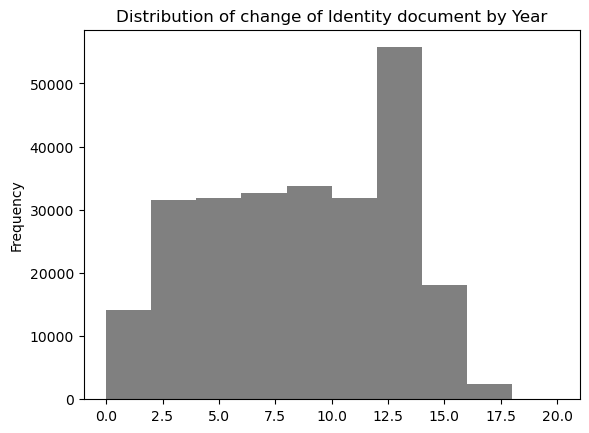

In [104]:
df1.YEAR_ID_PUBLISH.plot.hist(bins = 10, color = 'grey')
plt.title('Distribution of change of Identity document by Year')
plt.show()

In [105]:
#There are highest number of people who changed their identity documentation 12.5-13.5 years before applying to the loan

## Bivariate Analysis and Muli VariateAnalysis


### Numeric - Numeric analysis



In [106]:
cols= ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

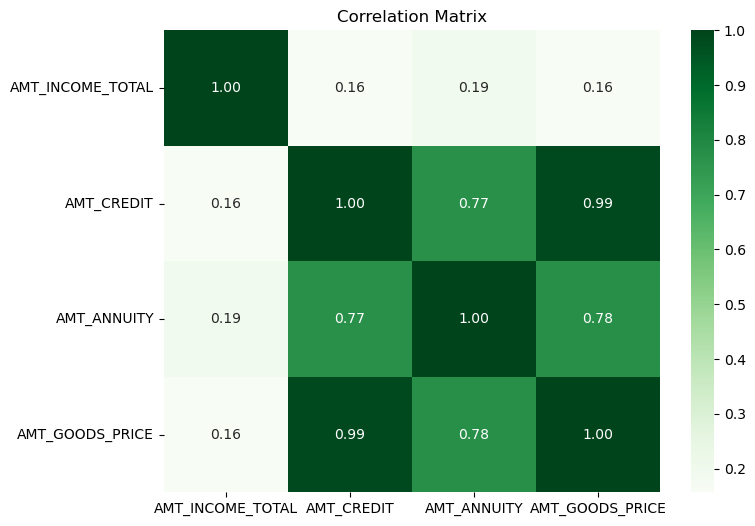

In [107]:
correlation_matrix = df[cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True,cmap='Greens', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [108]:
# Credit and Goods Price have a high corellation so we can say people are applying for loan for almost the whole amount of the 
#good they need

# There is a significant corelation between the annuiy amount and goods price  ans also the annuity and credi amount

In [109]:
# we are converting some of the columns into categorical values for further analysis for example TARGET,FLAG_OWN_CAR etc

cols = ['TARGET','FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL']
for i in cols:
    df1[i] = df1[i].astype('object')


### Numeric - Categorical analysis


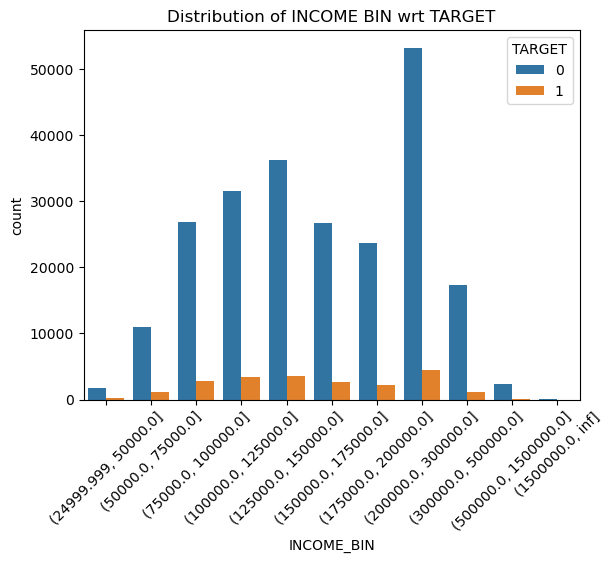

In [110]:

df1['INCOME_BIN'] = pd.cut(df1['AMT_INCOME_TOTAL'], bins=[25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000,300000,500000,1500000 ,np.inf], include_lowest=True)
# Plot the count of target variable for each income bin using seaborn
sns.countplot(data=df1, x='INCOME_BIN', hue='TARGET')
plt.title('Distribution of INCOME BIN wrt TARGET')
plt.xticks(rotation = 45)
plt.show()

In [111]:
# People wih income range 2,00,000 - 3,00,000 range have applied most for the loan

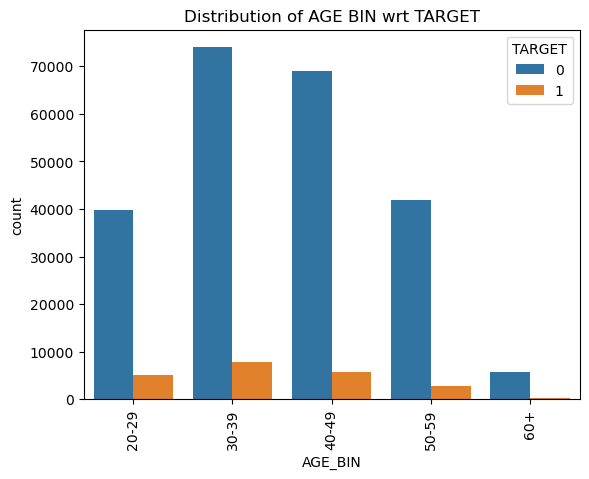

In [112]:
df1['AGE_BIN'] = pd.cut(df1['YEAR_BIRTH'], bins = [20,30,40,50,60,100] , labels = ['20-29', '30-39', '40-49', '50-59', '60+'])
sns.countplot(data=df1, x='AGE_BIN', hue='TARGET')
plt.xticks(rotation = 90)
plt.title('Distribution of AGE BIN wrt TARGET')
plt.show()


In [113]:
# There are more defaulters in middile as comared to old and yound age people

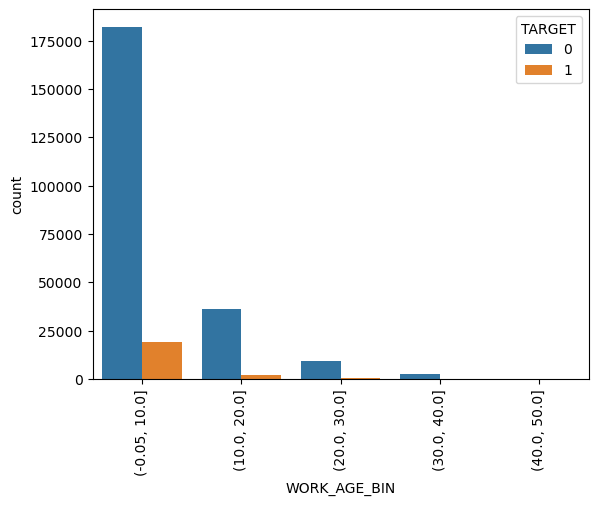

In [114]:
df1['WORK_AGE_BIN'] = pd.cut(df1['YEAR_EMPLOYED'], bins=5)
sns.countplot(data=df1, x='WORK_AGE_BIN', hue='TARGET')
plt.xticks(rotation = 90)
plt.show()

In [115]:
# People wih work experience of 1-10 years took he loan mosly

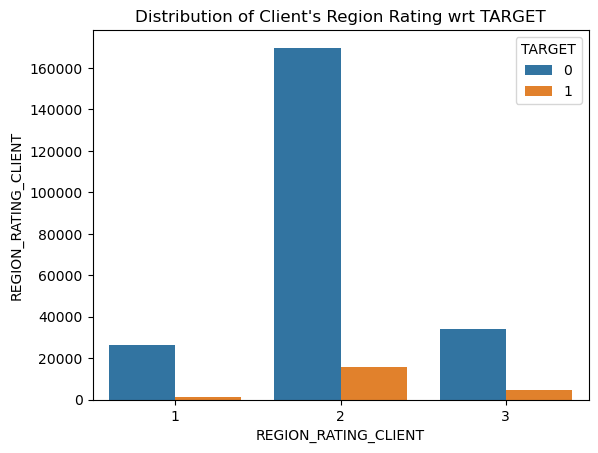

In [116]:
sns.barplot(data=df1, x='REGION_RATING_CLIENT',y = "REGION_RATING_CLIENT", hue='TARGET' , estimator = len)
plt.title('Distribution of Client\'s Region Rating wrt TARGET')
plt.show()

### Categorical - Categorical analysis


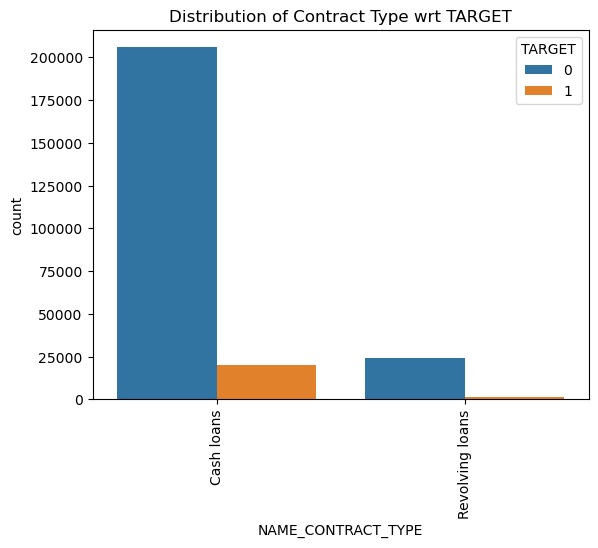

In [117]:
sns.countplot(data=df1, x='NAME_CONTRACT_TYPE', hue='TARGET')
plt.xticks(rotation = 90)
plt.title('Distribution of Contract Type wrt TARGET')
plt.show()

In [118]:
# Mos loan are of Cash loan type

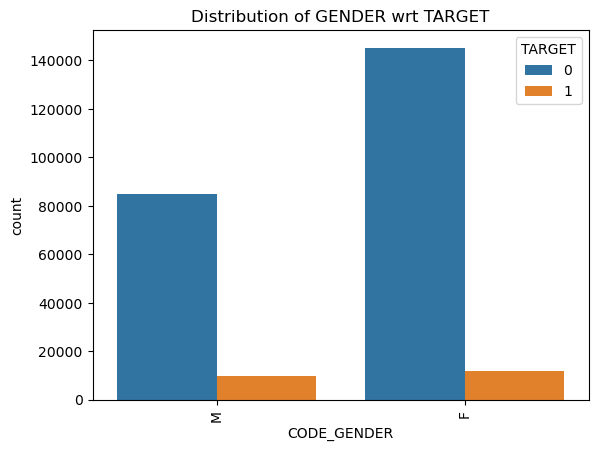

In [119]:
sns.countplot(data=df1, x='CODE_GENDER', hue='TARGET')
plt.xticks(rotation = 90)
plt.title('Distribution of GENDER wrt TARGET')
plt.show()

In [120]:
# Though the number of females who took loan are higher than males, The default ratio of males is higher than that of females

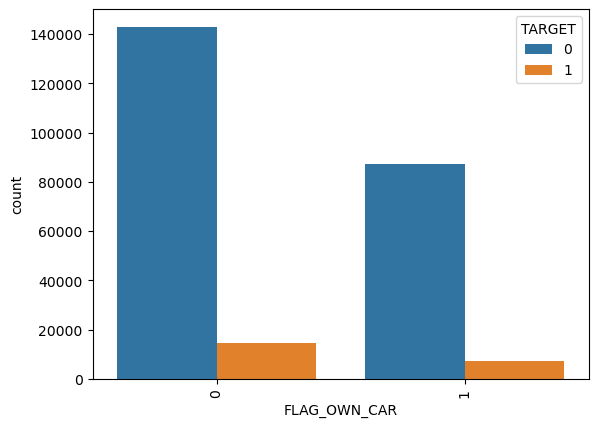

In [121]:
sns.countplot(data=df1, x='FLAG_OWN_CAR', hue='TARGET')
plt.xticks(rotation = 90)
plt.show()

In [122]:
#People almost applied for loan irrespective of them pocessing a Car. Although the percent of people who donot have a car applied
# for loan slightly more

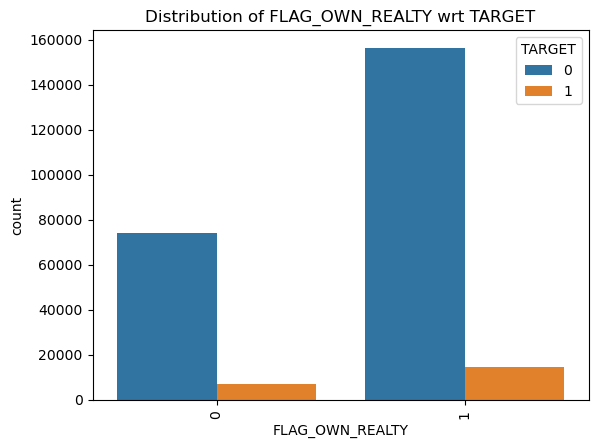

In [123]:
sns.countplot(data=df1, x='FLAG_OWN_REALTY', hue='TARGET')
plt.xticks(rotation = 90)
plt.title('Distribution of FLAG_OWN_REALTY wrt TARGET')
plt.show()

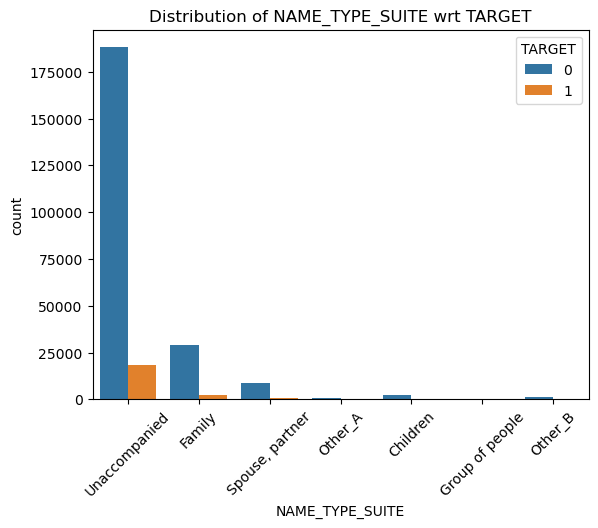

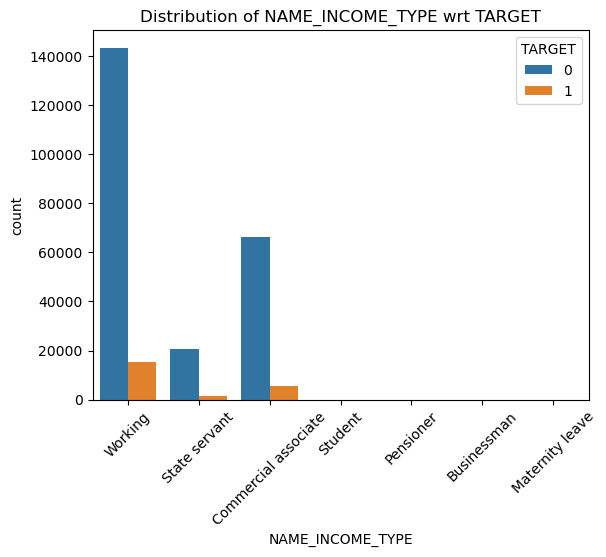

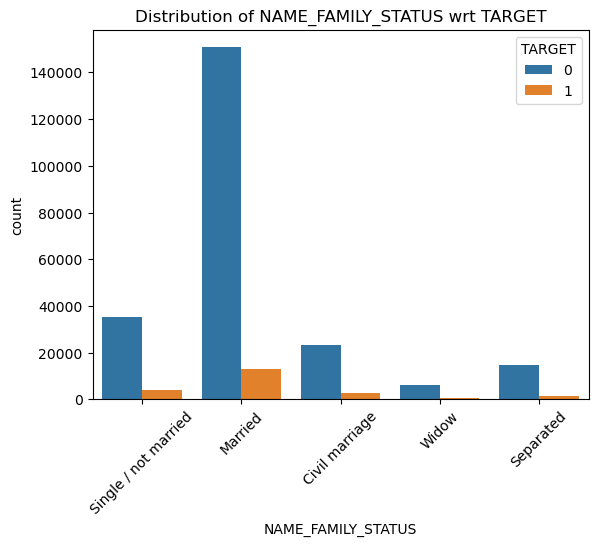

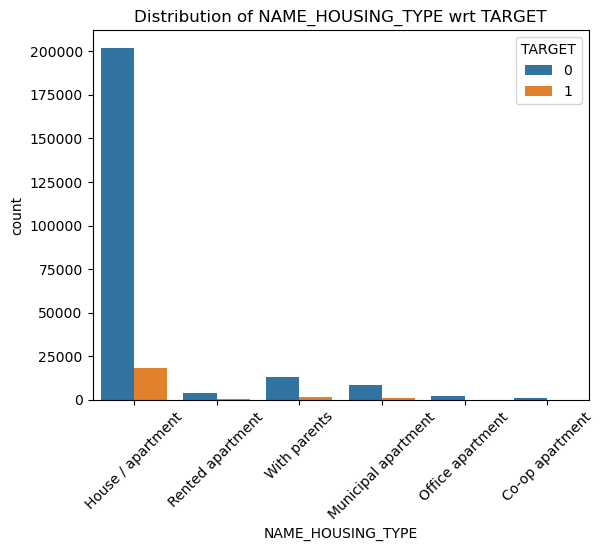

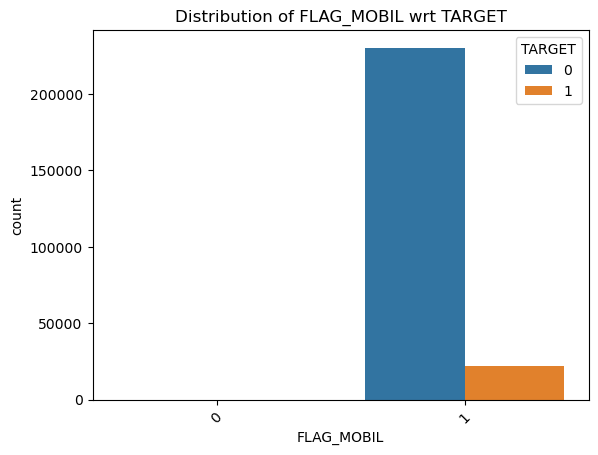

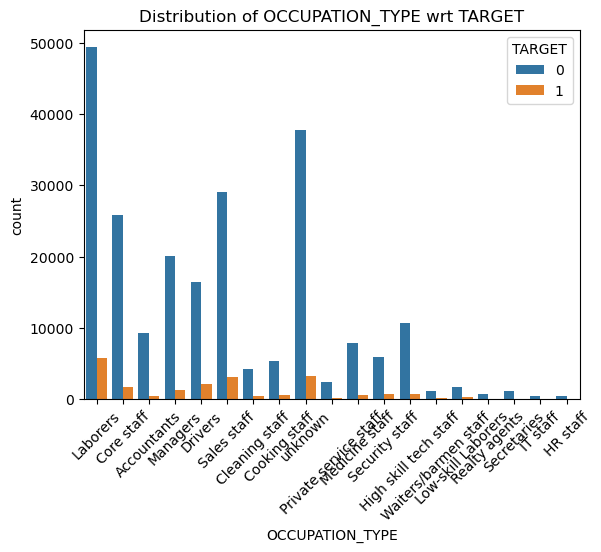

In [124]:
cols = ['NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'OCCUPATION_TYPE']
for i in cols:
    sns.countplot(data=df1, x=i, hue='TARGET')
    plt.title(f'Distribution of {i} wrt TARGET')
    plt.xticks(rotation = 45)
    plt.show()

In [125]:
# NAME_TYPE_SUIT

# Most people who defaulted the loans were Unaccompanied people

In [126]:
# NAME_INCOME_TYPE

# Working class people and Commercial associate people defaulted the loans more


In [127]:
# NAME_HOUSING_TYPE

# people who own House/Partment applied for the loan most and defaulte the loan most

In [128]:
# FLAG_MOBILE

# Everyone has mobile

#### Multi  Variate analysis


In [129]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252131 entries, 0 to 307510
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  252131 non-null  object  
 1   TARGET                      252131 non-null  object  
 2   NAME_CONTRACT_TYPE          252131 non-null  object  
 3   CODE_GENDER                 252131 non-null  object  
 4   FLAG_OWN_CAR                252131 non-null  object  
 5   FLAG_OWN_REALTY             252131 non-null  object  
 6   CNT_CHILDREN                252131 non-null  int64   
 7   AMT_INCOME_TOTAL            252131 non-null  float64 
 8   AMT_CREDIT                  252131 non-null  float64 
 9   AMT_ANNUITY                 252131 non-null  float64 
 10  AMT_GOODS_PRICE             252131 non-null  float64 
 11  NAME_TYPE_SUITE             252131 non-null  object  
 12  NAME_INCOME_TYPE            252131 non-null  object  
 13  NAME

In [130]:
DEF = df1[df1.TARGET == 1]
ND = df1[~(df1.TARGET == 1)]

In [131]:
res = pd.pivot_table(data = DEF, index ="NAME_CONTRACT_TYPE", columns = "CODE_GENDER", values = "TARGET" , aggfunc = 'count')

In [132]:
res

CODE_GENDER             F     M
NAME_CONTRACT_TYPE             
Cash loans          10982  9389
Revolving loans       939   525

Text(0.5, 1.0, 'Disribution of Contract type and Gender w.r.t TARGET count')

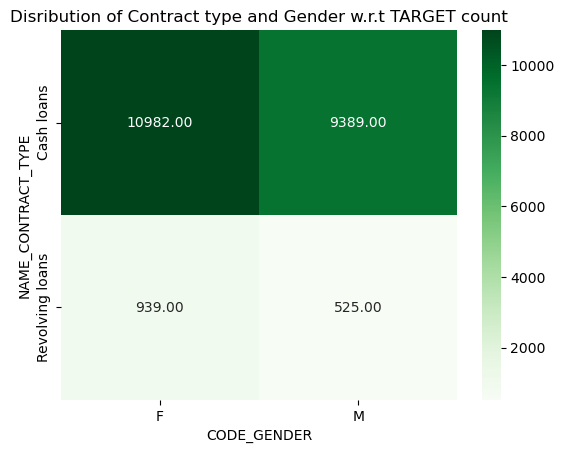

In [133]:
sns.heatmap(res , annot = True ,cmap = 'Greens', fmt=".2f")
plt.title('Disribution of Contract type and Gender w.r.t TARGET count')

In [134]:

res = pd.pivot_table(data = DEF, index ="NAME_INCOME_TYPE", columns = "CODE_GENDER", values = "TARGET" , aggfunc = 'count')

In [135]:
res

CODE_GENDER                F       M
NAME_INCOME_TYPE                    
Commercial associate  2968.0  2392.0
Maternity leave          2.0     NaN
State servant          847.0   402.0
Working               8104.0  7120.0

Text(0.5, 1.0, 'Disribution of Income type and Gender w.r.t TARGET count')

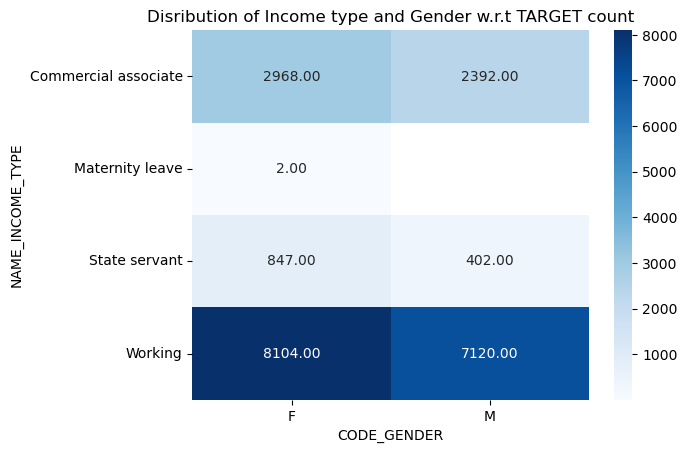

In [136]:
sns.heatmap(res , annot = True ,cmap = 'Blues', fmt=".2f")
plt.title('Disribution of Income type and Gender w.r.t TARGET count')

In [137]:
res = pd.pivot_table(data = DEF, index ="NAME_INCOME_TYPE", columns = "INCOME_BIN", values = "TARGET" , aggfunc = 'count')

In [138]:
res

INCOME_BIN            (24999.999, 50000.0]  (50000.0, 75000.0]  \
NAME_INCOME_TYPE                                                 
Commercial associate                    19                 164   
Maternity leave                          1                   1   
State servant                           17                  76   
Working                                151                 934   

INCOME_BIN            (75000.0, 100000.0]  (100000.0, 125000.0]  \
NAME_INCOME_TYPE                                                  
Commercial associate                  463                   691   
Maternity leave                         0                     0   
State servant                         160                   191   
Working                              2192                  2471   

INCOME_BIN            (125000.0, 150000.0]  (150000.0, 175000.0]  \
NAME_INCOME_TYPE                                                   
Commercial associate                   813                   674   
Maternity leave                          0                     0   
State servant                          185                   160   
Working                               2600                  1831   

INCOME_BIN            (175000.0, 200000.0]  (200000.0, 300000.0]  \
NAME_INCOME_TYPE                                                   
Commercial associate                   621                  1369   
Maternity leave                          0                     0   
State servant                          128                   257   
Working                               1502                  2898   

INCOME_BIN            (300000.0, 500000.0]  (500000.0, 1500000.0]  \
NAME_INCOME_TYPE                                                    
Commercial associate                   470                     73   
Maternity leave                          0                      0   
State servant                           66                      8   
Working                                587                     57   

INCOME_BIN            (1500000.0, inf]  
NAME_INCOME_TYPE                        
Commercial associate                 3  
Maternity leave                      0  
State servant                        1  
Working                              1

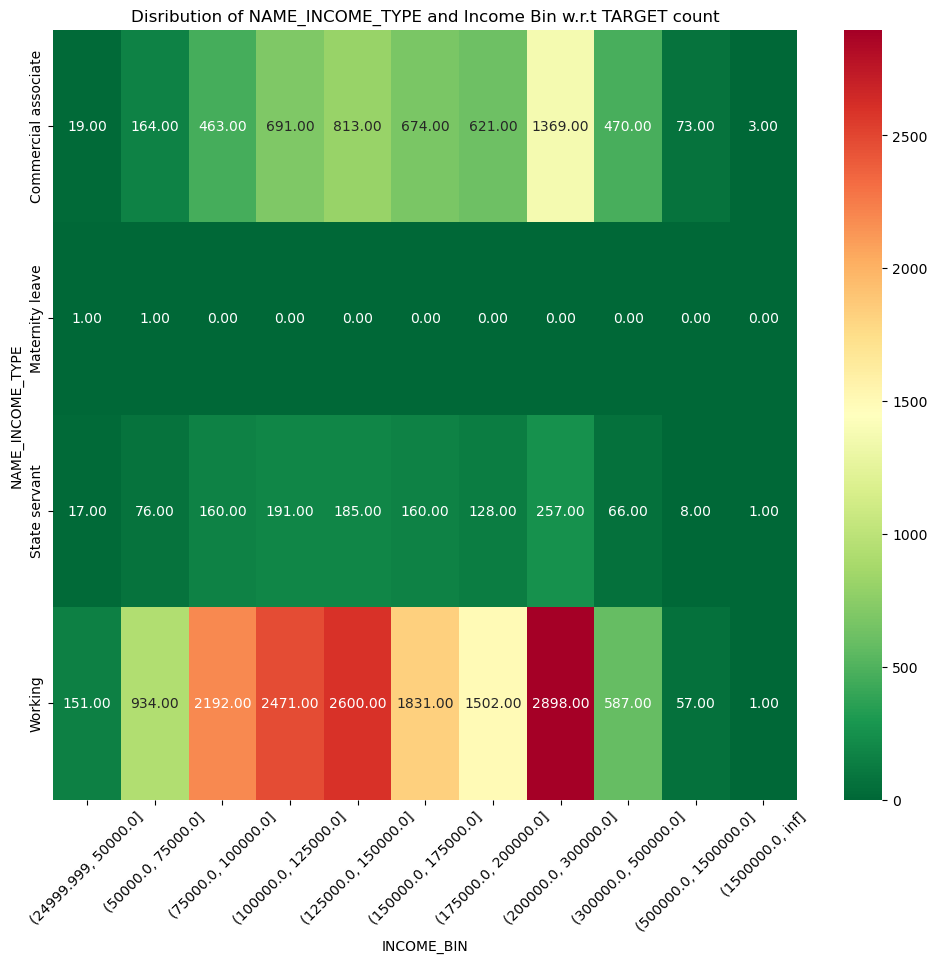

In [139]:
plt.figure(figsize=(12,10))
sns.heatmap(res , annot = True ,cmap = 'RdYlGn_r', fmt=".2f")
plt.title('Disribution of NAME_INCOME_TYPE and Income Bin w.r.t TARGET count')
plt.xticks(rotation = 45)
plt.show()

In [140]:
res = pd.pivot_table(data = DEF, index ="AGE_BIN", columns = "INCOME_BIN", values = "TARGET" , aggfunc = 'count')

In [141]:
res

INCOME_BIN  (24999.999, 50000.0]  (50000.0, 75000.0]  (75000.0, 100000.0]  \
AGE_BIN                                                                     
20-29                         41                 320                  773   
30-39                         69                 423                  988   
40-49                         53                 295                  691   
50-59                         25                 133                  333   
60+                            0                   4                   30   

INCOME_BIN  (100000.0, 125000.0]  (125000.0, 150000.0]  (150000.0, 175000.0]  \
AGE_BIN                                                                        
20-29                        981                   907                   647   
30-39                       1106                  1311                  1014   
40-49                        789                   900                   668   
50-59                        431                   440                   302   
60+                           46                    40                    34   

INCOME_BIN  (175000.0, 200000.0]  (200000.0, 300000.0]  (300000.0, 500000.0]  \
AGE_BIN                                                                        
20-29                        464                   844                   147   
30-39                        822                  1624                   423   
40-49                        631                  1250                   368   
50-59                        312                   737                   168   
60+                           22                    69                    17   

INCOME_BIN  (500000.0, 1500000.0]  (1500000.0, inf]  
AGE_BIN                                              
20-29                          15                 0  
30-39                          46                 3  
40-49                          53                 1  
50-59                          21                 1  
60+                             3                 0

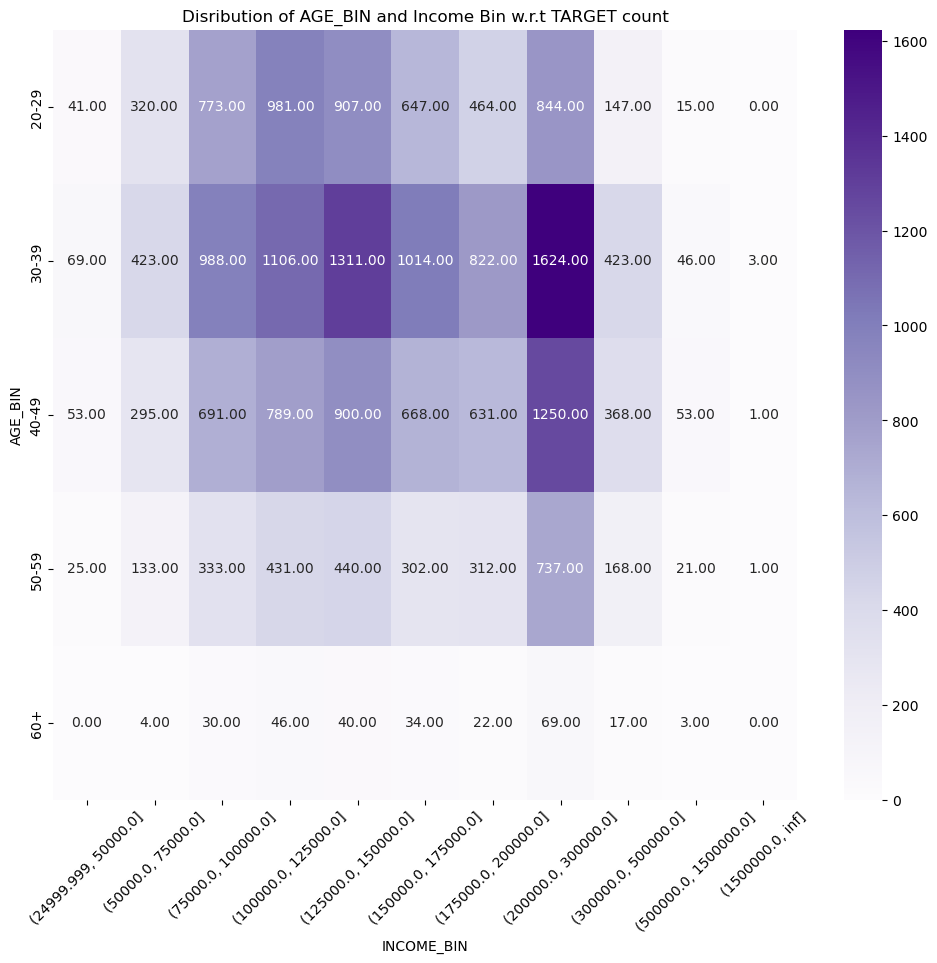

In [142]:
plt.figure(figsize=(12,10))
sns.heatmap(res , annot = True ,cmap = 'Purples', fmt=".2f")
plt.title('Disribution of AGE_BIN and Income Bin w.r.t TARGET count')
plt.xticks(rotation = 45)
plt.show()

In [143]:
res = pd.pivot_table(data = DEF, index ="AGE_BIN", columns = "OCCUPATION_TYPE", values = "TARGET" , aggfunc = 'count')

In [144]:
res

OCCUPATION_TYPE  Accountants  Cleaning staff  Cooking staff  Core staff  \
AGE_BIN                                                                   
20-29                    107              43            137         583   
30-39                    174             124            239         597   
40-49                    121             148            171         382   
50-59                     64             106             69         157   
60+                        8              26              5          19   

OCCUPATION_TYPE  Drivers  HR staff  High skill tech staff  IT staff  Laborers  \
AGE_BIN                                                                         
20-29                389        15                    167        13      1322   
30-39                683        10                    239        14      2234   
40-49                653         6                    178         6      1472   
50-59                363         4                    104         1       763   
60+                   19         1                     13         0        47   

OCCUPATION_TYPE  Low-skill Laborers  Managers  Medicine staff  \
AGE_BIN                                                         
20-29                            85       172             118   
30-39                           139       523             193   
40-49                            95       383             174   
50-59                            38       230              69   
60+                               2        20              18   

OCCUPATION_TYPE  Private service staff  Realty agents  Sales staff  \
AGE_BIN                                                              
20-29                               47             13          924   
30-39                               63             31         1161   
40-49                               53             11          703   
50-59                               12              4          287   
60+                                  0              0           17   

OCCUPATION_TYPE  Secretaries  Security staff  Waiters/barmen staff  unknown  
AGE_BIN                                                                      
20-29                     30              99                    72      803  
30-39                     34             201                    50     1120  
40-49                     20             209                    19      895  
50-59                      8             187                    11      426  
60+                        0              26                     0       44

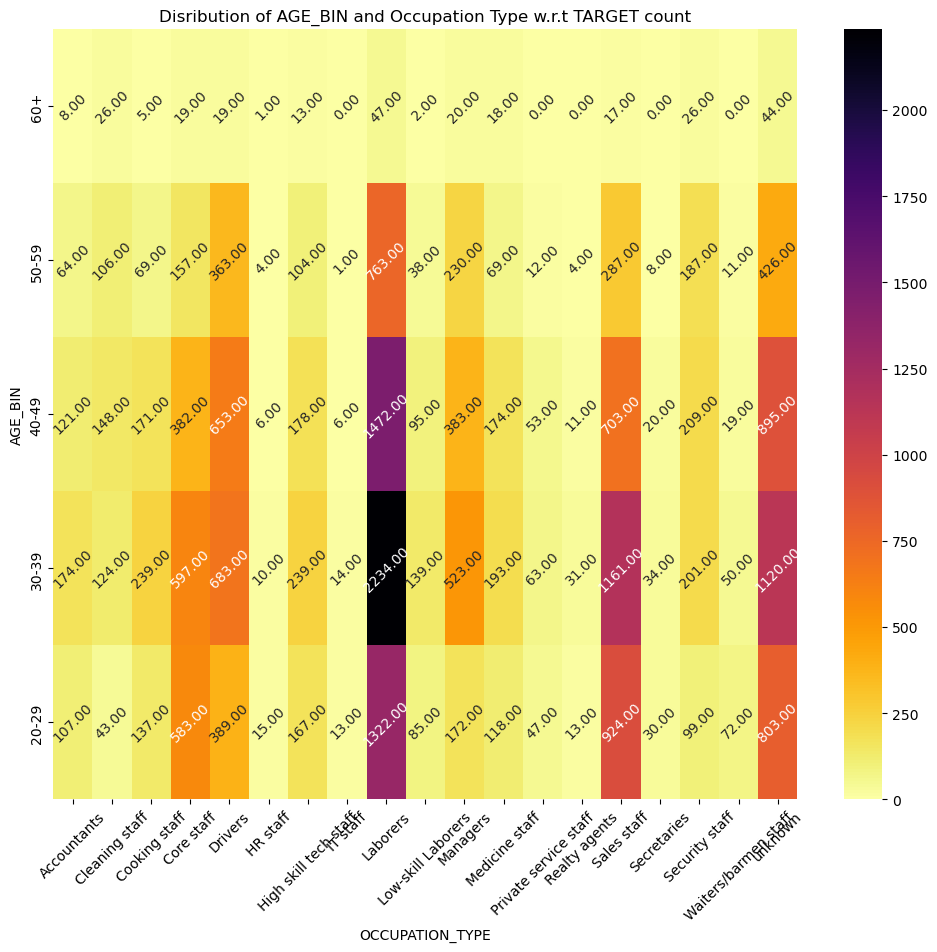

In [145]:
plt.figure(figsize=(12,10))
sns.heatmap(res , annot = True ,cmap = 'inferno_r', fmt=".2f" ,annot_kws={"rotation": 45})
plt.title('Disribution of AGE_BIN and Occupation Type w.r.t TARGET count')
plt.xticks(rotation = 45)
plt.gca().invert_yaxis()
plt.show()

## Previous application data


In [146]:
prev = pd.read_csv("C:/Users/chpsy/Downloads/assignment/previous_application.csv")

In [147]:
prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [148]:
prev.replace('XNA',np.nan,inplace=True)
prev.replace('XAP',np.nan,inplace=True)

In [149]:
null_cols = prev.isnull().sum()/len(prev)*100
null_cols

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.020716
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE         95.830774
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE              37.563091
CODE_REJECT_REASON             81.327123
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.116213
NAME_GOODS_CATEGORY            56.927376
NAME_PORTFOLIO                 22.286366
NAME_PRODUCT_TYP

In [150]:
for i in null_cols.index:
    if null_cols.loc[i] > 25:
        prev.drop(columns = i ,axis = 1, inplace = True)

In [151]:
null_cols = prev.isnull().sum()/len(prev)*100
null_cols

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.020716
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_CLIENT_TYPE                0.116213
NAME_PORTFOLIO                 22.286366
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
dtype: float64

In [152]:
prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 19 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1669868 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CONTRACT_STATUS         1670214 non-null  object 
 12  DAYS_DECISION                1670214 non-n

In [153]:
# dropping the irrelevant columns
cols=['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']
prev.drop(columns=cols,axis=1,inplace=True)

In [154]:
prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 15 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   SK_ID_PREV            1670214 non-null  int64  
 1   SK_ID_CURR            1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE    1669868 non-null  object 
 3   AMT_ANNUITY           1297979 non-null  float64
 4   AMT_APPLICATION       1670214 non-null  float64
 5   AMT_CREDIT            1670213 non-null  float64
 6   AMT_GOODS_PRICE       1284699 non-null  float64
 7   NAME_CONTRACT_STATUS  1670214 non-null  object 
 8   DAYS_DECISION         1670214 non-null  int64  
 9   NAME_CLIENT_TYPE      1668273 non-null  object 
 10  NAME_PORTFOLIO        1297984 non-null  object 
 11  CHANNEL_TYPE          1670214 non-null  object 
 12  SELLERPLACE_AREA      1670214 non-null  int64  
 13  CNT_PAYMENT           1297984 non-null  float64
 14  PRODUCT_COMBINATION   1669868 non-

In [155]:
null_cols[null_cols>0]

NAME_CONTRACT_TYPE      0.020716
AMT_ANNUITY            22.286665
AMT_CREDIT              0.000060
AMT_GOODS_PRICE        23.081773
NAME_CLIENT_TYPE        0.116213
NAME_PORTFOLIO         22.286366
CNT_PAYMENT            22.286366
PRODUCT_COMBINATION     0.020716
dtype: float64

#### Handling missing values in PRODUCT_COMBINATION,NAME_CLIENT_TYPE,
#### AMT_CREDIT & NAME_CONTRACT_TYPE

In [156]:
t = ["PRODUCT_COMBINATION", "NAME_CLIENT_TYPE","AMT_CREDIT", "NAME_CONTRACT_TYPE"]
for i in t:
    prev  = prev[~(prev[i].isna())]

In [157]:
prev.isna().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NAME_CONTRACT_TYPE           0
AMT_ANNUITY             370849
AMT_APPLICATION              0
AMT_CREDIT                   0
AMT_GOODS_PRICE         384163
NAME_CONTRACT_STATUS         0
DAYS_DECISION                0
NAME_CLIENT_TYPE             0
NAME_PORTFOLIO          370844
CHANNEL_TYPE                 0
SELLERPLACE_AREA             0
CNT_PAYMENT             370844
PRODUCT_COMBINATION          0
dtype: int64

#### Handling null values in CNT_PAYMENT

In [158]:
prev[prev.CNT_PAYMENT.isnull()].head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
6      2315218      175704         Cash loans          NaN              0.0   
7      1656711      296299         Cash loans          NaN              0.0   
8      2367563      342292         Cash loans          NaN              0.0   
9      2579447      334349         Cash loans          NaN              0.0   
22     1172842      302212         Cash loans          NaN              0.0   

    AMT_CREDIT  AMT_GOODS_PRICE NAME_CONTRACT_STATUS  DAYS_DECISION  \
6          0.0              NaN             Canceled            -14   
7          0.0              NaN             Canceled            -21   
8          0.0              NaN             Canceled           -386   
9          0.0              NaN             Canceled            -57   
22         0.0              NaN              Refused           -239   

   NAME_CLIENT_TYPE NAME_PORTFOLIO             CHANNEL_TYPE  SELLERPLACE_AREA  \
6          Repeater            NaN  Credit and cash offices                -1   
7          Repeater            NaN  Credit and cash offices                -1   
8          Repeater            NaN  Credit and cash offices                -1   
9          Repeater            NaN  Credit and cash offices                -1   
22         Repeater            NaN  Credit and cash offices                -1   

    CNT_PAYMENT PRODUCT_COMBINATION  
6           NaN                Cash  
7           NaN                Cash  
8           NaN                Cash  
9           NaN                Cash  
22          NaN                Cash

In [159]:
prev.CNT_PAYMENT.describe().astype(int)

count    1297082
mean          16
std           14
min            0
25%            6
50%           12
75%           24
max           84
Name: CNT_PAYMENT, dtype: int32

In [160]:
# There is a significant difference between the mean and the median 
# so we will fill the values with the median

In [161]:
prev.CNT_PAYMENT.fillna(prev.CNT_PAYMENT.median() , inplace = True)

In [162]:
prev.CNT_PAYMENT.isnull().sum()

0

#### Handling missing values in NAME_PORTFOLIO

In [163]:
prev.NAME_PORTFOLIO.isnull().sum()

370844

In [164]:
prev[prev.NAME_PORTFOLIO.isnull()].head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
6      2315218      175704         Cash loans          NaN              0.0   
7      1656711      296299         Cash loans          NaN              0.0   
8      2367563      342292         Cash loans          NaN              0.0   
9      2579447      334349         Cash loans          NaN              0.0   
22     1172842      302212         Cash loans          NaN              0.0   

    AMT_CREDIT  AMT_GOODS_PRICE NAME_CONTRACT_STATUS  DAYS_DECISION  \
6          0.0              NaN             Canceled            -14   
7          0.0              NaN             Canceled            -21   
8          0.0              NaN             Canceled           -386   
9          0.0              NaN             Canceled            -57   
22         0.0              NaN              Refused           -239   

   NAME_CLIENT_TYPE NAME_PORTFOLIO             CHANNEL_TYPE  SELLERPLACE_AREA  \
6          Repeater            NaN  Credit and cash offices                -1   
7          Repeater            NaN  Credit and cash offices                -1   
8          Repeater            NaN  Credit and cash offices                -1   
9          Repeater            NaN  Credit and cash offices                -1   
22         Repeater            NaN  Credit and cash offices                -1   

    CNT_PAYMENT PRODUCT_COMBINATION  
6          12.0                Cash  
7          12.0                Cash  
8          12.0                Cash  
9          12.0                Cash  
22         12.0                Cash

In [165]:
prev.NAME_PORTFOLIO.info()

<class 'pandas.core.series.Series'>
Index: 1667926 entries, 0 to 1670213
Series name: NAME_PORTFOLIO
Non-Null Count    Dtype 
--------------    ----- 
1297082 non-null  object
dtypes: object(1)
memory usage: 25.5+ MB


In [166]:
prev.NAME_PORTFOLIO.mode()

0    POS
Name: NAME_PORTFOLIO, dtype: object

In [167]:
# Filling with mode values as it is a categorical variable

In [168]:
prev.NAME_PORTFOLIO.fillna(prev.NAME_PORTFOLIO.mode()[0], inplace = True)

In [169]:
prev.NAME_PORTFOLIO.isnull().sum()

0

#### Handling Null values in AMT_GOODS_PRICE

In [170]:
prev.AMT_GOODS_PRICE.isnull().sum()

384163

In [171]:
prev.AMT_GOODS_PRICE.describe().astype('int')

count    1283763
mean      227801
std       315371
min            0
25%        50832
50%       112284
75%       234000
max      6905160
Name: AMT_GOODS_PRICE, dtype: int32

In [172]:
#As there si significant difference in mean and median we will fill the values
# with median

In [173]:
prev.AMT_GOODS_PRICE.fillna(prev.AMT_GOODS_PRICE.median(),inplace = True)

In [174]:
prev.AMT_GOODS_PRICE.isnull().sum()

0

#### Handling Null values in AMT_ANNUITY

In [175]:
prev.AMT_ANNUITY.isnull().sum()

370849

In [176]:
prev[prev.AMT_ANNUITY.isnull()].head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
6      2315218      175704         Cash loans          NaN              0.0   
7      1656711      296299         Cash loans          NaN              0.0   
8      2367563      342292         Cash loans          NaN              0.0   
9      2579447      334349         Cash loans          NaN              0.0   
22     1172842      302212         Cash loans          NaN              0.0   

    AMT_CREDIT  AMT_GOODS_PRICE NAME_CONTRACT_STATUS  DAYS_DECISION  \
6          0.0         112284.0             Canceled            -14   
7          0.0         112284.0             Canceled            -21   
8          0.0         112284.0             Canceled           -386   
9          0.0         112284.0             Canceled            -57   
22         0.0         112284.0              Refused           -239   

   NAME_CLIENT_TYPE NAME_PORTFOLIO             CHANNEL_TYPE  SELLERPLACE_AREA  \
6          Repeater            POS  Credit and cash offices                -1   
7          Repeater            POS  Credit and cash offices                -1   
8          Repeater            POS  Credit and cash offices                -1   
9          Repeater            POS  Credit and cash offices                -1   
22         Repeater            POS  Credit and cash offices                -1   

    CNT_PAYMENT PRODUCT_COMBINATION  
6          12.0                Cash  
7          12.0                Cash  
8          12.0                Cash  
9          12.0                Cash  
22         12.0                Cash

In [177]:
prev.AMT_ANNUITY.mean()

15953.986928848477

In [178]:
prev.AMT_ANNUITY.median()

11250.0

In [179]:
# We will fill the values with the median

In [180]:
prev.AMT_ANNUITY.fillna(prev.AMT_ANNUITY.median(),inplace = True)

In [181]:
prev.AMT_ANNUITY.isnull().sum()

0

In [182]:
prev.isnull().sum()

SK_ID_PREV              0
SK_ID_CURR              0
NAME_CONTRACT_TYPE      0
AMT_ANNUITY             0
AMT_APPLICATION         0
AMT_CREDIT              0
AMT_GOODS_PRICE         0
NAME_CONTRACT_STATUS    0
DAYS_DECISION           0
NAME_CLIENT_TYPE        0
NAME_PORTFOLIO          0
CHANNEL_TYPE            0
SELLERPLACE_AREA        0
CNT_PAYMENT             0
PRODUCT_COMBINATION     0
dtype: int64

In [183]:
prev.DAYS_DECISION.head()

0    -73
1   -164
2   -301
3   -512
4   -781
Name: DAYS_DECISION, dtype: int64

In [184]:
prev.DAYS_DECISION = abs(prev.DAYS_DECISION)

#### Outlier Analysis

In [185]:
cols = prev.select_dtypes(include = ['int','float']).columns
cols

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT'],
      dtype='object')

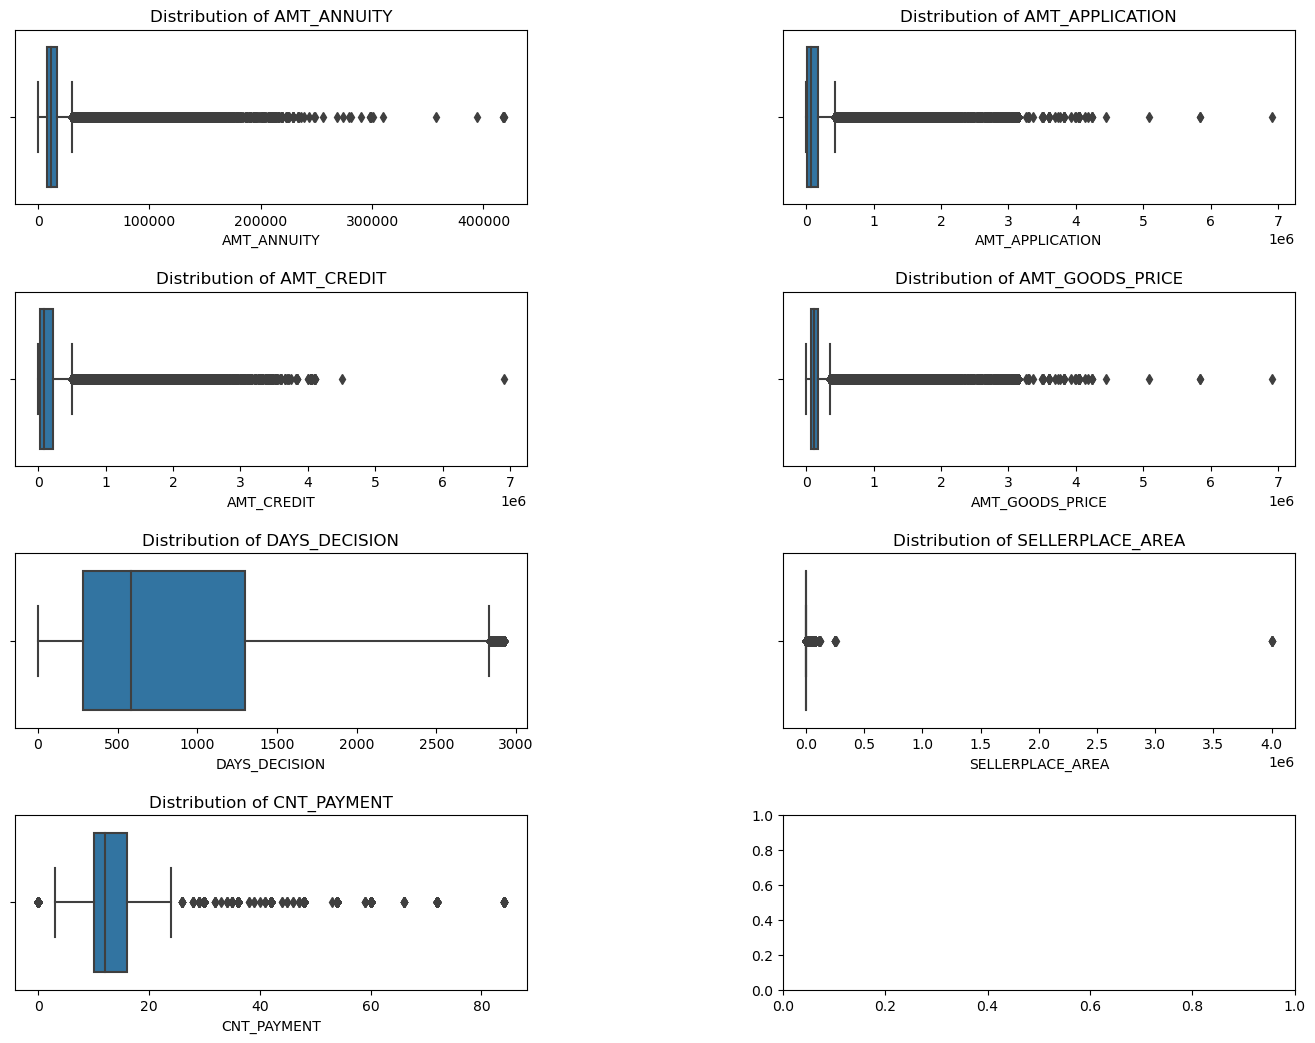

In [186]:
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.subplots_adjust(left=0, bottom=0, right=2, top=2, wspace=0.5, hspace=0.5)
for ax, column in zip(axes.flatten(), prev.select_dtypes(include=['int64','float64']).columns[2:]):
    sns.boxplot(x=prev[column], ax=ax)
    ax.set_title(f'Distribution of {column}')

plt.show()

As we can see there are outliers in many of the columns except for Days_decision
We will be ignoring these outliers because every parameter is related to the financial stream 

## Merging both Datasets

In [187]:
df2 = df1[['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER','AMT_INCOME_TOTAL','AMT_CREDIT', 
           'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
            'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','AGE_BIN','INCOME_BIN']]

In [188]:
#we will be dropping the common columns in both datasets as we will be
# doing inner join from prev dataset

t = ['NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE']
right = prev.drop(columns=t)

merged=pd.merge(left=df2,right=right,how='inner',on='SK_ID_CURR')
merged.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER  AMT_INCOME_TOTAL  \
0     100002      1         Cash loans           M          202500.0   
1     100003      0         Cash loans           F          270000.0   
2     100003      0         Cash loans           F          270000.0   
3     100003      0         Cash loans           F          270000.0   
4     100004      0    Revolving loans           M           67500.0   

   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0    406597.5      24700.5         351000.0   Unaccompanied          Working   
1   1293502.5      35698.5        1129500.0          Family    State servant   
2   1293502.5      35698.5        1129500.0          Family    State servant   
3   1293502.5      35698.5        1129500.0          Family    State servant   
4    135000.0       6750.0         135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

  OCCUPATION_TYPE AGE_BIN            INCOME_BIN  SK_ID_PREV  AMT_APPLICATION  \
0        Laborers   20-29  (200000.0, 300000.0]     1038818         179055.0   
1      Core staff   40-49  (200000.0, 300000.0]     1810518         900000.0   
2      Core staff   40-49  (200000.0, 300000.0]     2636178         337500.0   
3      Core staff   40-49  (200000.0, 300000.0]     2396755          68809.5   
4        Laborers   50-59    (50000.0, 75000.0]     1564014          24282.0   

  NAME_CONTRACT_STATUS  DAYS_DECISION NAME_CLIENT_TYPE NAME_PORTFOLIO  \
0             Approved            606              New            POS   
1             Approved            746         Repeater           Cash   
2             Approved            828        Refreshed            POS   
3             Approved           2341        Refreshed            POS   
4             Approved            815              New            POS   

              CHANNEL_TYPE  SELLERPLACE_AREA  CNT_PAYMENT  \
0                    Stone               500         24.0   
1  Credit and cash offices                -1         12.0   
2                    Stone              1400          6.0   
3             Country-wide               200         12.0   
4         Regional / Local                30          4.0   

           PRODUCT_COMBINATION  
0      POS other with interest  
1             Cash X-Sell: low  
2   POS industry with interest  
3  POS household with interest  
4  POS mobile without interest

####  Univariate Analysis


In [189]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138560 entries, 0 to 1138559
Data columns (total 26 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   SK_ID_CURR            1138560 non-null  object  
 1   TARGET                1138560 non-null  object  
 2   NAME_CONTRACT_TYPE    1138560 non-null  object  
 3   CODE_GENDER           1138560 non-null  object  
 4   AMT_INCOME_TOTAL      1138560 non-null  float64 
 5   AMT_CREDIT            1138560 non-null  float64 
 6   AMT_ANNUITY           1138560 non-null  float64 
 7   AMT_GOODS_PRICE       1138560 non-null  float64 
 8   NAME_TYPE_SUITE       1138560 non-null  object  
 9   NAME_INCOME_TYPE      1138560 non-null  object  
 10  NAME_EDUCATION_TYPE   1138560 non-null  object  
 11  NAME_FAMILY_STATUS    1138560 non-null  object  
 12  NAME_HOUSING_TYPE     1138560 non-null  object  
 13  OCCUPATION_TYPE       1138560 non-null  object  
 14  AGE_BIN           

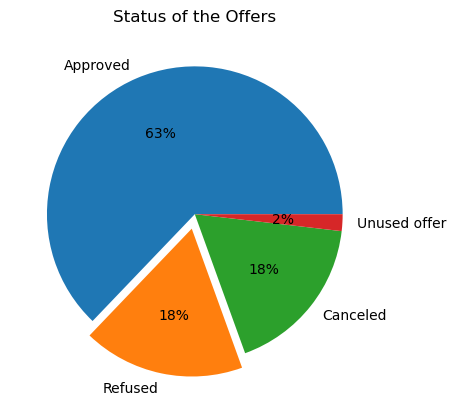

In [190]:
explode = [0, 0.1 , 0, 0] 
plt.pie(merged.NAME_CONTRACT_STATUS.value_counts(),explode = explode, 
        labels = merged.NAME_CONTRACT_STATUS.value_counts().index, autopct='%.0f%%')
plt.title('Status of the Offers')
plt.show()

About 63% of the applications were approved and only 2 percent of the offers are unused

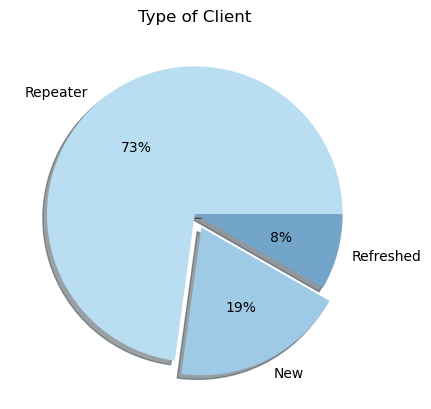

In [191]:
explode = [0, 0.1 , 0]
colors = ["#B9DDF1", "#9FCAE6", "#73A4CA"]
plt.pie(merged.NAME_CLIENT_TYPE.value_counts(),explode = explode, 
        labels = merged.NAME_CLIENT_TYPE.value_counts().index, autopct='%.0f%%' , shadow=True, colors = colors)
plt.title('Type of Client')
plt.show()

There are about 73% repeaters in the applicants

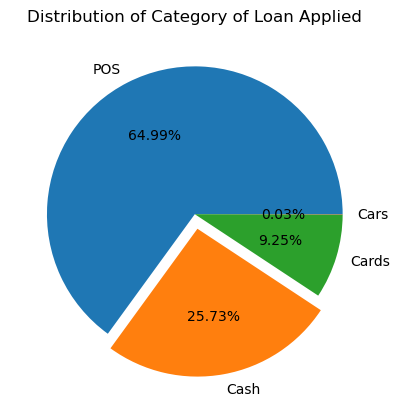

In [192]:
explode = [0, 0.1 , 0 , 0]
plt.pie(merged.NAME_PORTFOLIO.value_counts(),explode = explode, 
        labels = merged.NAME_PORTFOLIO.value_counts().index, autopct='%.2f%%')
plt.title('Distribution of Category of Loan Applied')
plt.show()

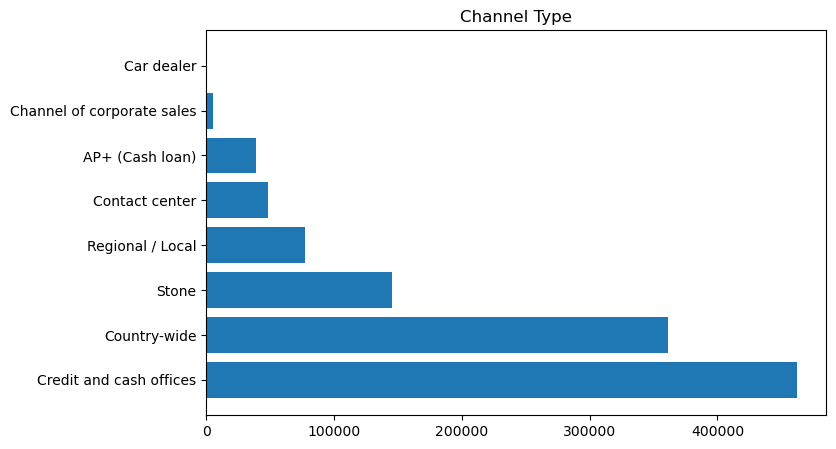

In [193]:
plt.figure(figsize=(8,5))
plt.barh(y = merged.CHANNEL_TYPE.value_counts().index, width = merged.CHANNEL_TYPE.value_counts().values)
plt.title('Channel Type')
plt.show()

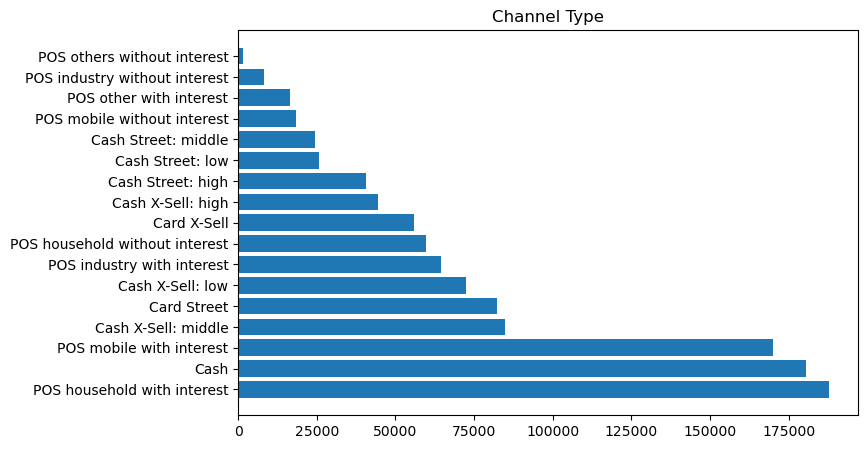

In [194]:
plt.figure(figsize=(8,5))
plt.barh(y = merged.PRODUCT_COMBINATION.value_counts().index, width = merged.PRODUCT_COMBINATION.value_counts().values)
plt.title('Channel Type')
plt.show()

#### Bivariate and Mulivariate Analysis

In [195]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138560 entries, 0 to 1138559
Data columns (total 26 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   SK_ID_CURR            1138560 non-null  object  
 1   TARGET                1138560 non-null  object  
 2   NAME_CONTRACT_TYPE    1138560 non-null  object  
 3   CODE_GENDER           1138560 non-null  object  
 4   AMT_INCOME_TOTAL      1138560 non-null  float64 
 5   AMT_CREDIT            1138560 non-null  float64 
 6   AMT_ANNUITY           1138560 non-null  float64 
 7   AMT_GOODS_PRICE       1138560 non-null  float64 
 8   NAME_TYPE_SUITE       1138560 non-null  object  
 9   NAME_INCOME_TYPE      1138560 non-null  object  
 10  NAME_EDUCATION_TYPE   1138560 non-null  object  
 11  NAME_FAMILY_STATUS    1138560 non-null  object  
 12  NAME_HOUSING_TYPE     1138560 non-null  object  
 13  OCCUPATION_TYPE       1138560 non-null  object  
 14  AGE_BIN           

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\chpsy\AppData\Local\Temp\ipykernel_23732\1500462749.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=1.0, h_pad=1.0, w_pad=1.0, rect=None)


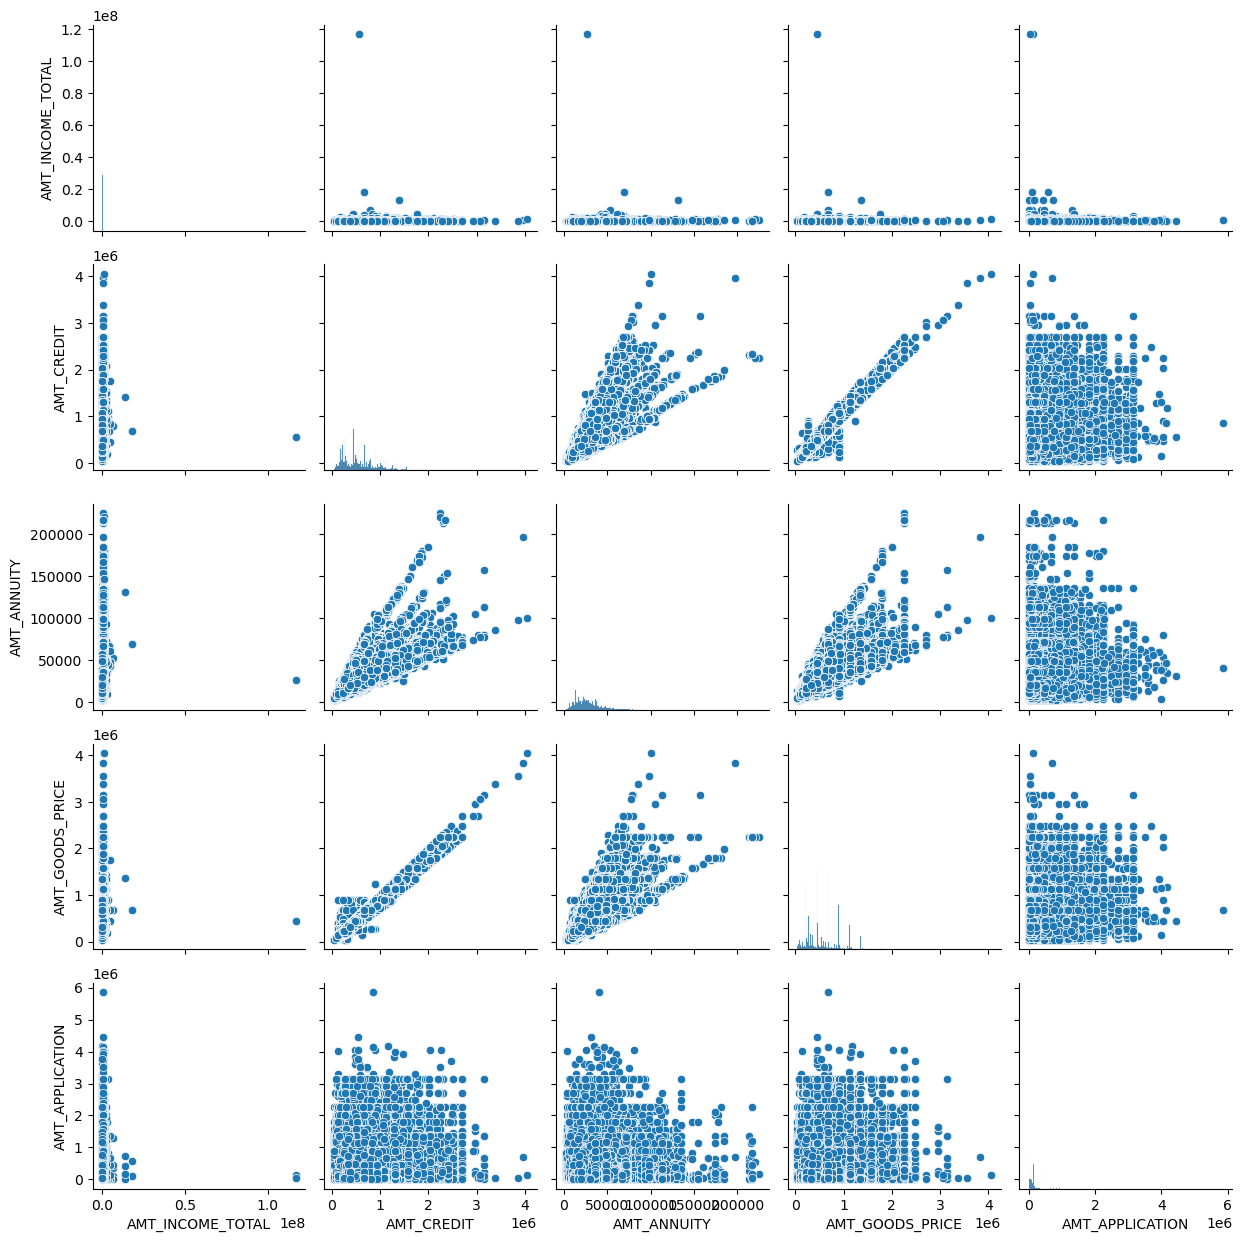

In [196]:
cols=['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE','AMT_APPLICATION']

sns.pairplot(data=merged, vars=cols)
plt.tight_layout(pad=1.0, h_pad=1.0, w_pad=1.0, rect=None)
plt.show()

We can see that there is a strong relation between AMT_CREDIT,AMT_GOODS_PRICE,AMT_ANNUITY

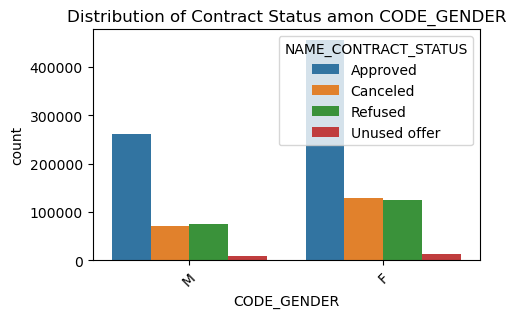

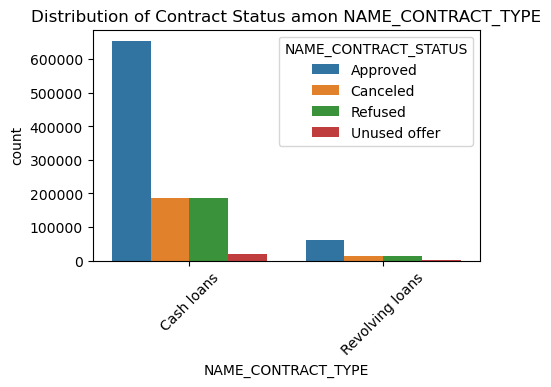

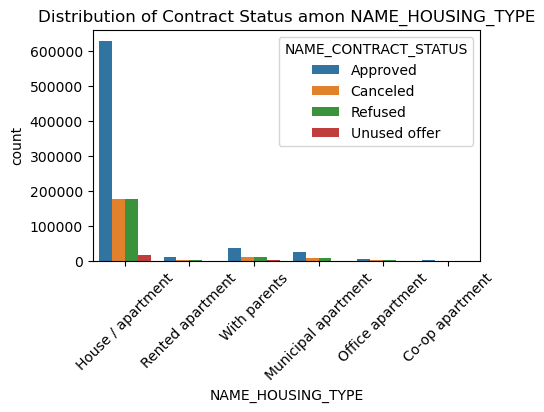

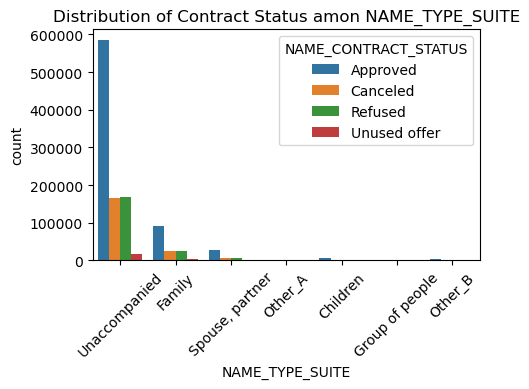

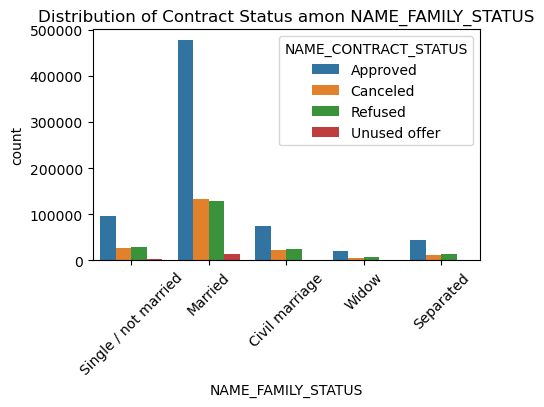

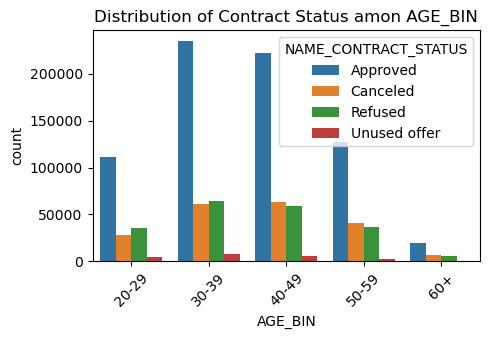

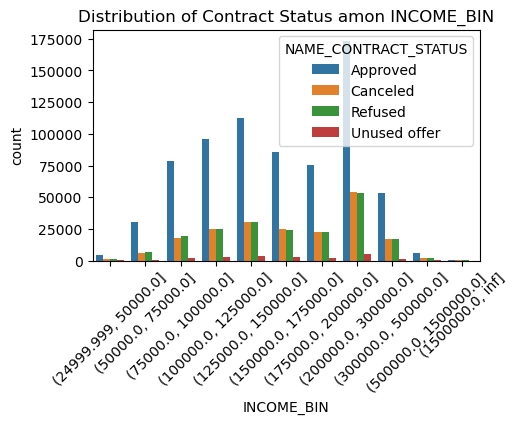

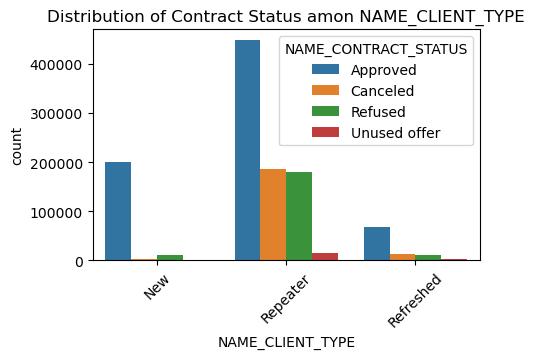

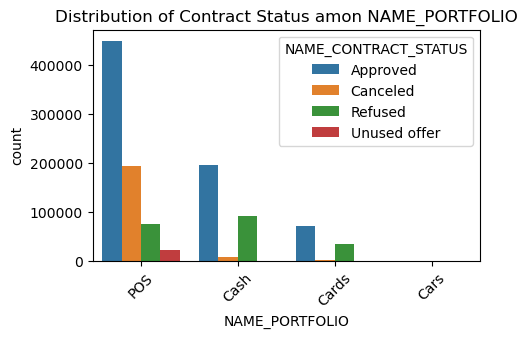

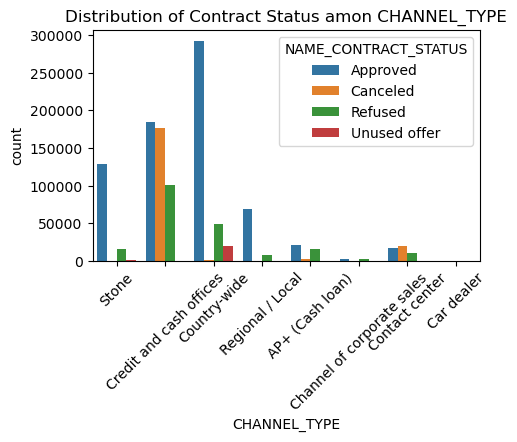

In [197]:
t=['CODE_GENDER','NAME_CONTRACT_TYPE','NAME_HOUSING_TYPE','NAME_TYPE_SUITE','NAME_FAMILY_STATUS','AGE_BIN',
      'INCOME_BIN','NAME_CLIENT_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE']
for i in t:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=i, hue='NAME_CONTRACT_STATUS', data=merged)
    plt.xticks(rotation = 45)
    plt.title(f'Distribution of Contract Status amon {i}')
    plt.show()

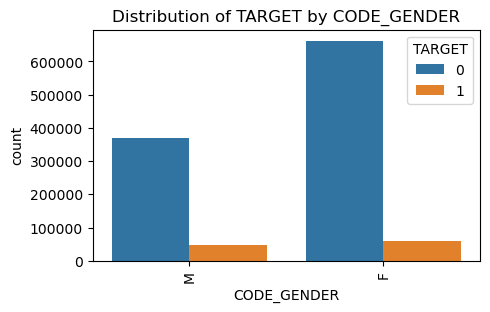

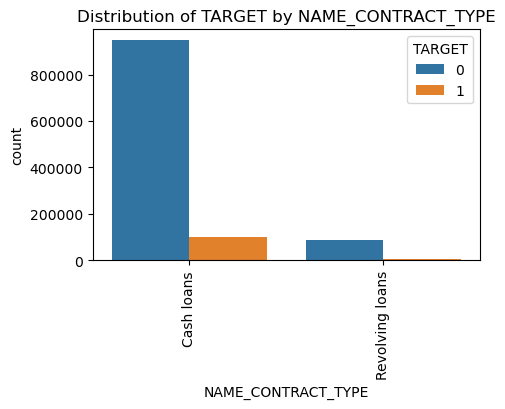

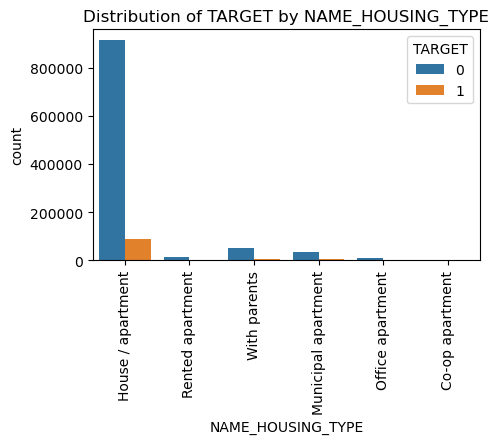

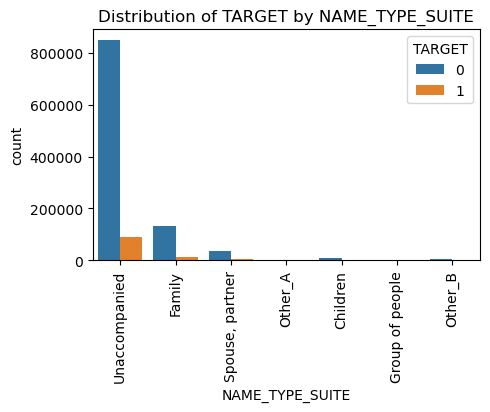

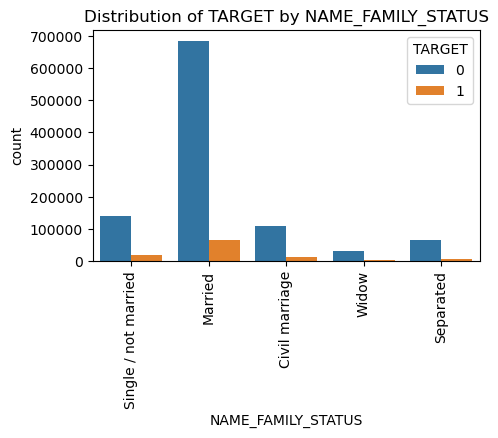

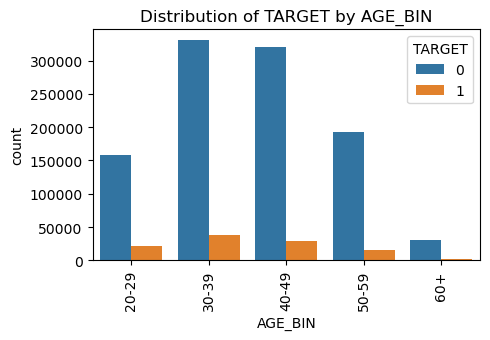

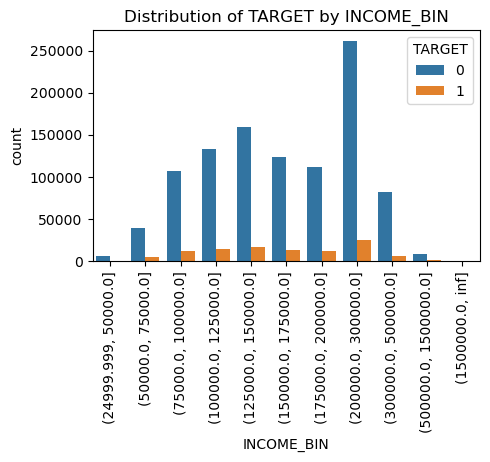

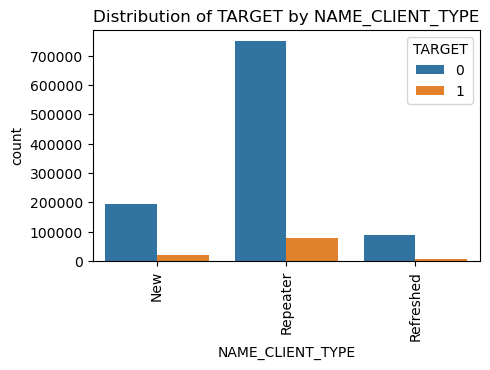

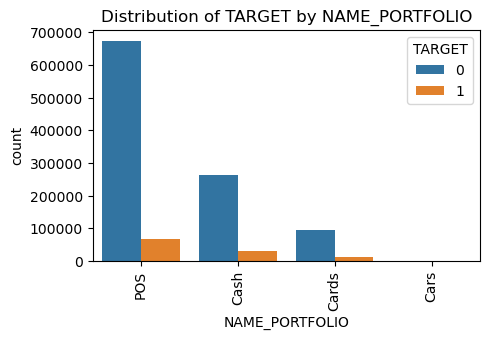

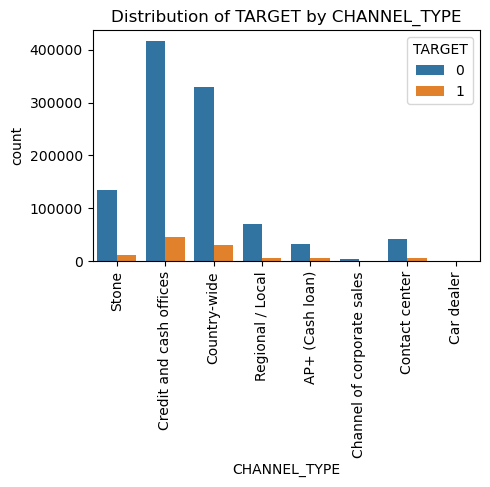

In [198]:
for i in t:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=i, hue='TARGET', data=merged)
    plt.title(f'Distribution of TARGET by {i}')
    plt.xticks(rotation = 90)
    plt.show()

In [199]:
default = merged[merged.TARGET == 1]
non_def = merged[~(merged.TARGET == 1)]

In [200]:
merged.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'AGE_BIN',
       'INCOME_BIN', 'SK_ID_PREV', 'AMT_APPLICATION', 'NAME_CONTRACT_STATUS',
       'DAYS_DECISION', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'CNT_PAYMENT', 'PRODUCT_COMBINATION'],
      dtype='object')

## Multivariate Analysis


In [201]:
res = pd.pivot_table(data = default, index ="NAME_CONTRACT_STATUS", columns = "CODE_GENDER", values = "TARGET" , aggfunc = 'count')

In [202]:
res

CODE_GENDER               F      M
NAME_CONTRACT_STATUS              
Approved              32750  25517
Canceled              11584   8575
Refused               14605  11334
Unused offer            949    825

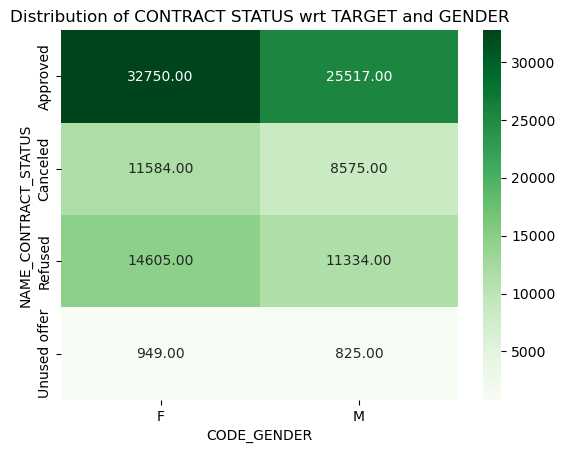

In [203]:
sns.heatmap(res , annot = True ,cmap = 'Greens', fmt=".2f")
plt.title("Distribution of CONTRACT STATUS wrt TARGET and GENDER")
plt.show()

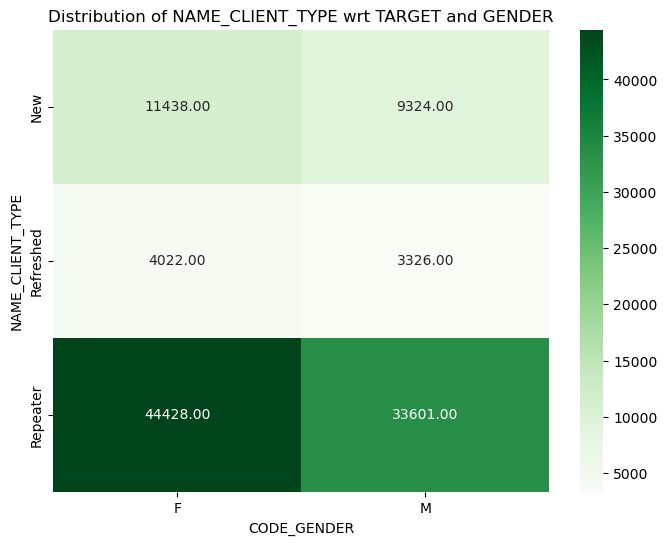

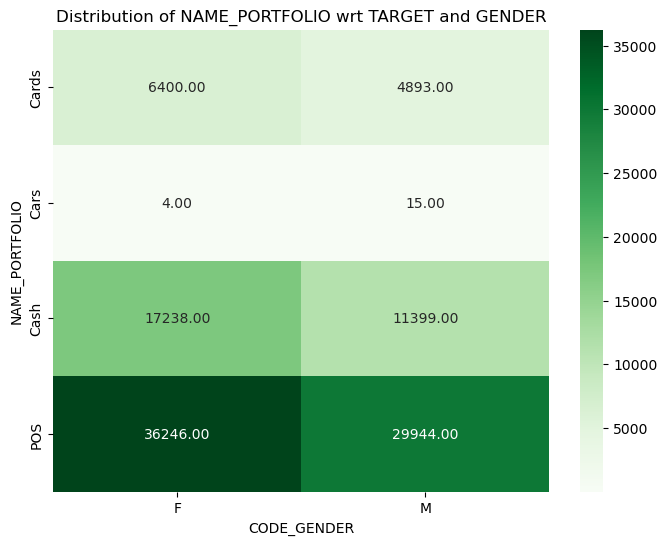

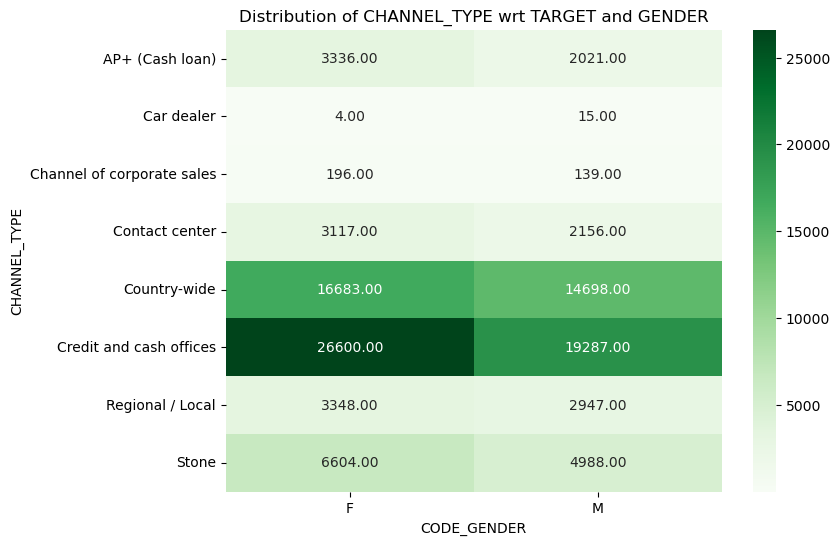

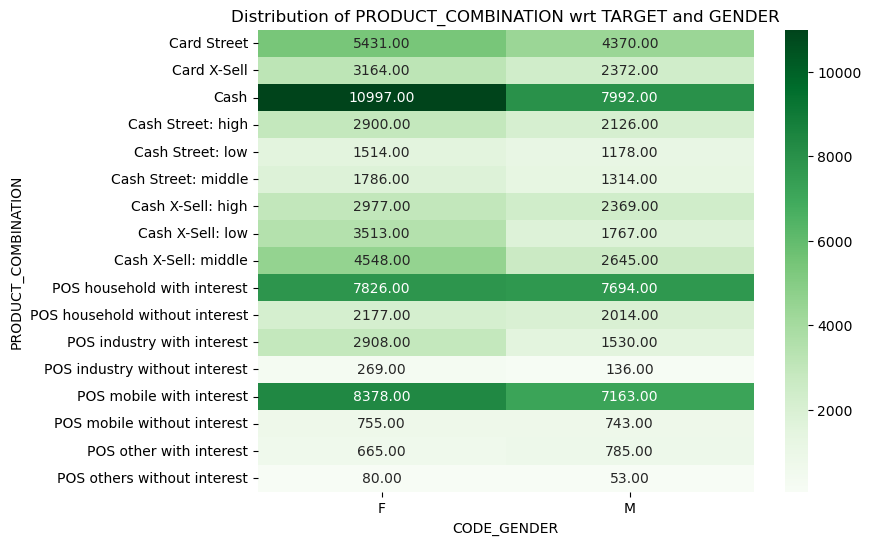

In [204]:
cols = ['NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'CHANNEL_TYPE', 'PRODUCT_COMBINATION']
for i in cols:
    res = pd.pivot_table(data = default, index =i, columns = "CODE_GENDER", values = "TARGET" , aggfunc = 'count')
    plt.figure(figsize=(8, 6))
    plt.title(f'Distribution of {i} wrt TARGET and GENDER')
    sns.heatmap(res , annot = True ,cmap = 'Greens', fmt=".2f")

### NAME_CLIENT_TYPE 

#### Most the female Defaulters were repeaters

### NAME_PORTFOLIO

#### Most the female Defaulters took POS loans in the previous application

### PRODUCT_COMBINATION

#### Most of the defaulters took Cash, POS household with interest, POS mobile with interest